# Frequency NGRAMS -  Times Digital Archive


The key here is to have a look at what we are getting with the track of each individual series - by plotting  the mention of each term over time - giving them each individual term a line in the graph. So we can see if the use of terms changes over time


### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
NON_AZ_19_REGEXP = re.compile('[^a-z0-9]')

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=200

### Functions

In [3]:
def normalize(word):
    """
    Normalize a word by converting it to lower-case and removing all
    characters that are not 'a',...,'z'.
    :param word: Word to normalize
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """
    return re.sub(NON_AZ_19_REGEXP, '', word.lower())

In [4]:
def lemmatize(word):
    """
    Lemmatize a word, using a lexical knowledge bases to get the
    correct base forms of a word.
    Like stemming, lemmatization reduces inflectional forms to a
    common base form. As opposed to stemming, lemmatization does not
    simply chop off inflections. Instead it uses lexical knowledge
    bases to get the correct base forms of words.
    :param word: Word to normalize
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """
    lemmatizer = WordNetLemmatizer()
    norm_word = normalize(word)
    return lemmatizer.lemmatize(norm_word)

In [5]:
def freq_count(results):
    freq_count={}
    for year in results:
        for i in results[year]:
            if i[0] not in freq_count:
                freq_count[i[0]]={}
                freq_count[i[0]][year]=i[1]
                
            else:
                if year not in freq_count[i[0]]:
                    freq_count[i[0]][year]=i[1]
                else:    
                    freq_count[i[0]][year]+=i[1]
    return freq_count

In [6]:
def normalize_freq(publication, freq_results, view_terms):
    plt.figure(figsize=(20,8))
    years=set()
    for term in view_terms:
        if term in freq_results:
            normed_results = {}
            for year in freq_results[term]:
                if year>0:
                    normed_results[year] = (freq_results[term][year]* len(term.split()))/float(publication[year][2])
                    years.add(year)
            plt.plot(*zip(*sorted(normed_results.items())), label=term, lw = 2, alpha = 1, marker="X")
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 1.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(loc='upper left')
    plt.xlabel("Years")
    plt.ylabel("Normalized Frequency")
    plt.show()       

In [7]:
def read_query_results(filename):
    with open('./results_TDA/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [8]:
def plot_freq_count(freq_results, view_terms):
    plt.figure(figsize=(20,8))
    years=set()
    for term in view_terms:
        if term in freq_results:
            plt.plot(*zip(*sorted(freq_results[term].items())), label=term, lw = 2, alpha = 1, marker="X")
            for y in freq_results[term].keys(): 
                years.add(y)     
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 1.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.xlabel("Years")
    plt.show()

In [9]:
def plot_norm(publication, element):
    plt.figure(figsize=(20,8))
    num_element={}
    years=set()
    for year in publication:
        if element == "words":
            num_element[year]=publication[year][2]
        elif element == "articles":
            num_element[year]=publication[year][1]
        else:
            num_element[year]=publication[year][0]
        years.add(year)  
    plt.plot(*zip(*sorted(num_element.items())), label=element, lw = 2, alpha = 1, marker="X")
    x_years=sorted(list(years))
    plt.xticks(np.arange(min(x_years), max(x_years)+1, 1.0), rotation=45) 
    plt.ticklabel_format(style = 'plain')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(loc='upper left')
    plt.ylabel('Number of ' + element + 'per volumne')
    plt.xlabel("Years")

    plt.show()
    return num_element, years

## 1. Normalised Query

First we examine the total number of issues, articles and words published over the period to see how much our search terms are affected by the way that published increases over the measurement period.

The query return the results in this format:

    {
      <YEAR>: [<NUM_ISSUES>, <NUM_ARTICLES>, <NUM_WORDS>],
      ...
    }

In [10]:
norm_publication=read_query_results('results_norm_tda')

#for printing the values, we are going to sort the values 
# by the years and just visualizing the first 10 years . 
#e.g --> First: 1785 year, with 255 issues, 4363 articles, and 3871604 words. 
#e.g --> Last: 1786 year, with 291 issues , 5488 articles and 4495019 words.

sorted(norm_publication.items())[:]

/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


[(1918, [622, 95788, 70472718]),
 (1919, [620, 131272, 116293290]),
 (1920, [311, 67954, 58826394]),
 (1921, [311, 69772, 51681638]),
 (1922, [309, 73729, 55640098]),
 (1923, [310, 67915, 56212126]),
 (1924, [311, 75885, 61317575]),
 (1925, [310, 76855, 63335332]),
 (1926, [310, 80621, 61396105]),
 (1927, [311, 78399, 64753526]),
 (1928, [310, 86738, 67790900]),
 (1929, [310, 90402, 66628423]),
 (1930, [310, 78953, 66699241]),
 (1931, [310, 85401, 64234237]),
 (1932, [312, 82151, 62347338]),
 (1933, [308, 85574, 62646328]),
 (1934, [310, 86146, 65207957]),
 (1935, [310, 91374, 65983765]),
 (1936, [311, 90761, 66502837]),
 (1937, [310, 91525, 66923086]),
 (1938, [311, 91585, 64820779]),
 (1939, [309, 79064, 54374674]),
 (1940, [311, 52936, 28583539]),
 (1941, [310, 42541, 22448760]),
 (1942, [310, 42087, 21806727]),
 (1943, [310, 42237, 22166050]),
 (1944, [310, 43012, 22608425]),
 (1945, [309, 44176, 23061145]),
 (1946, [309, 46261, 24757614]),
 (1947, [310, 45130, 24773688]),
 (1948, 

In order to set the scene and visualize how the issues, articles and words grew over the time, we are going to plot three basic graphs:        
- number of issues over time per year
- number of articles over time per year
- number of words over time per year
      

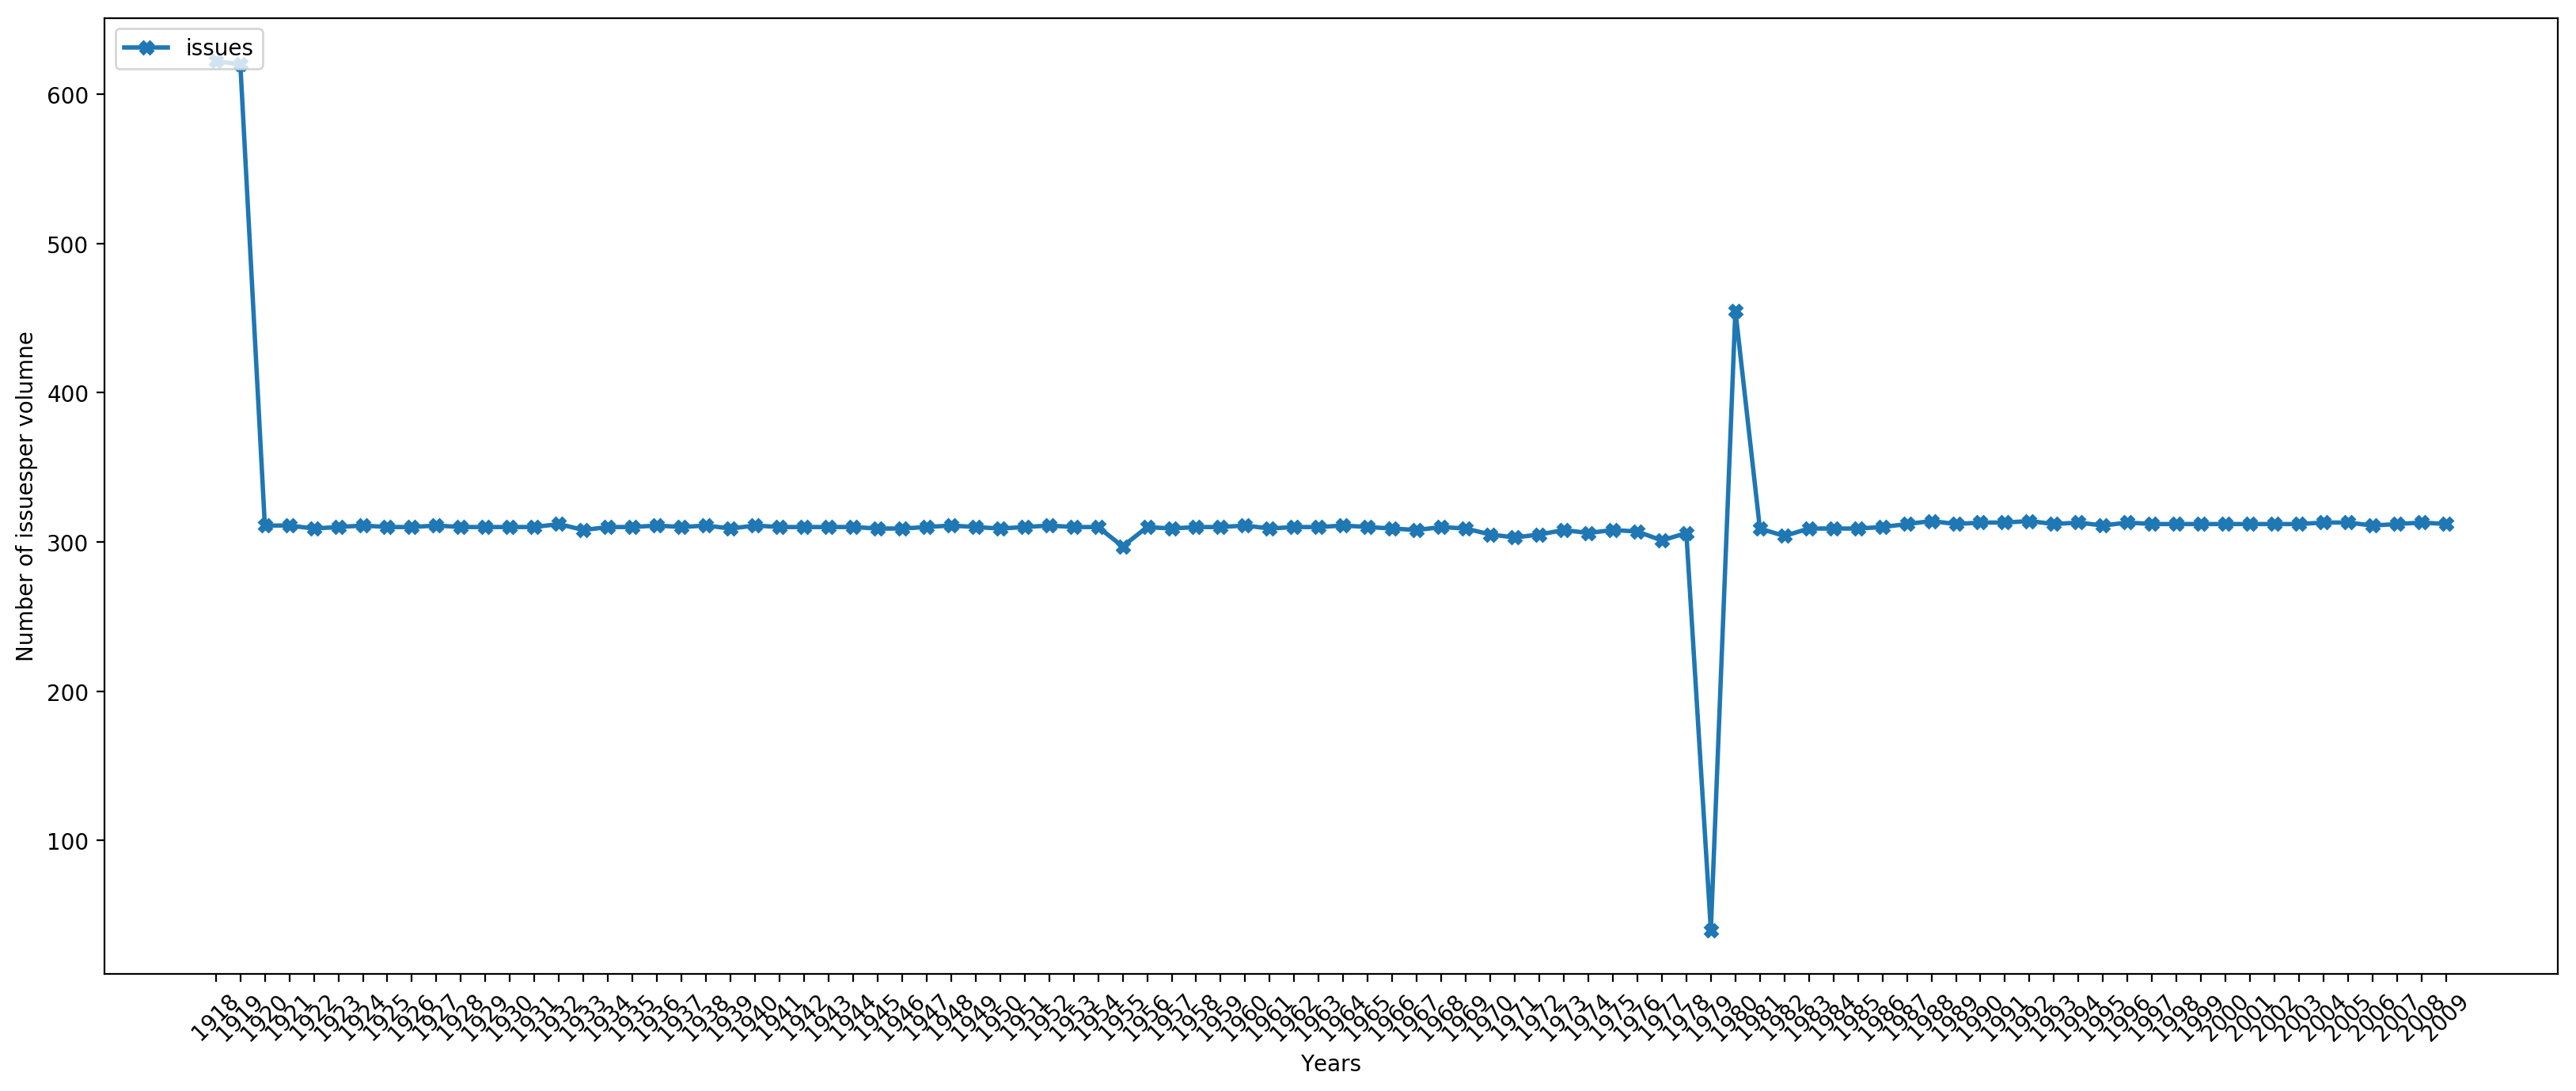

In [11]:
#Plot the variation of number of issues
num_issues, issues_years = plot_norm(norm_publication, "issues")


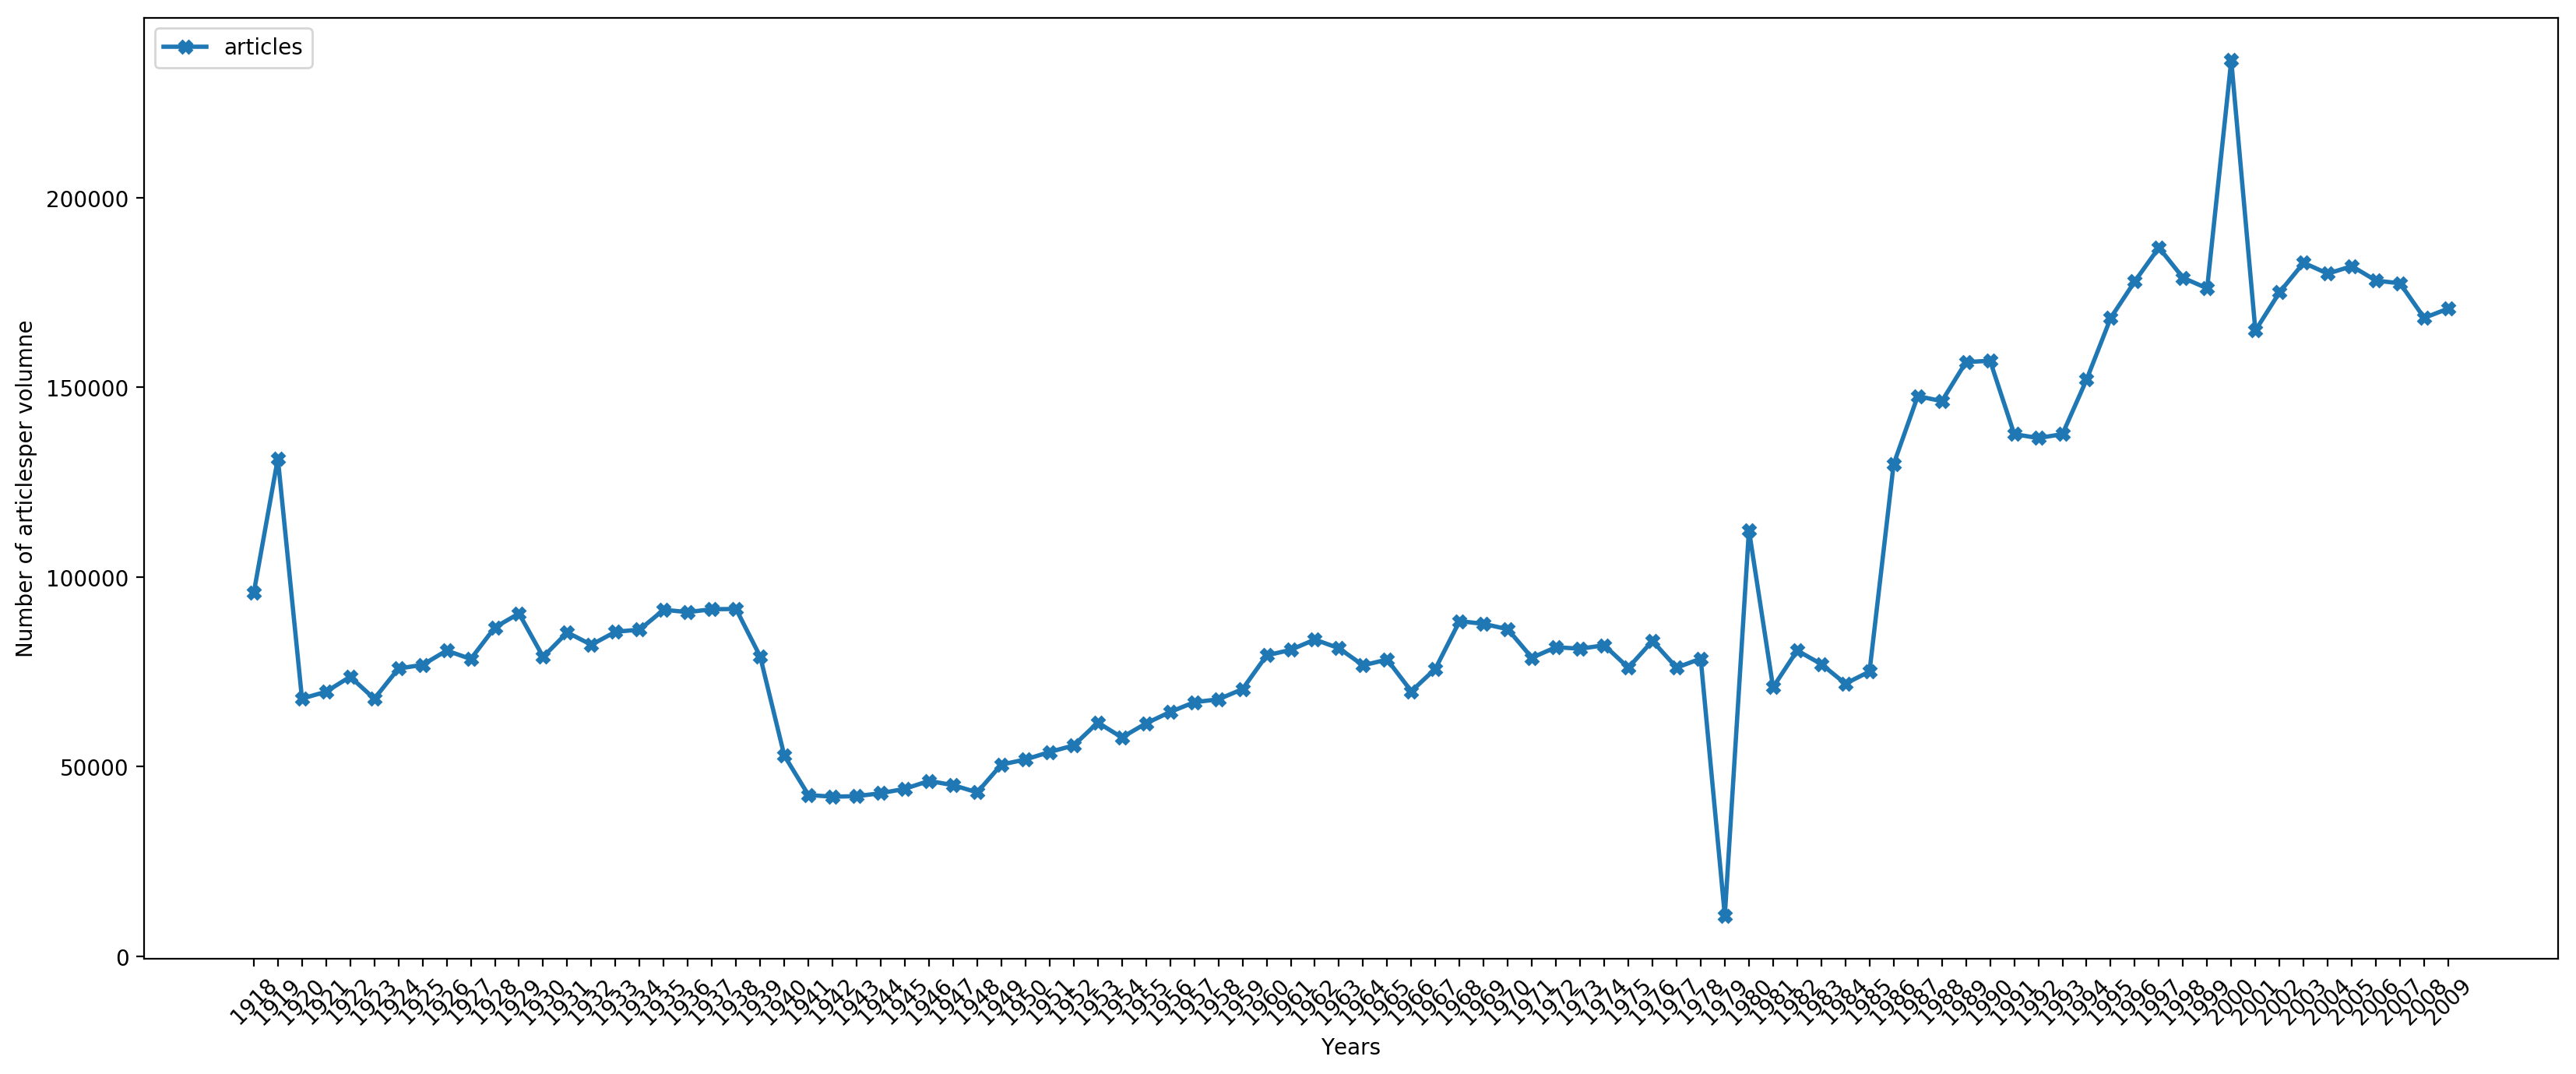

In [12]:
#Plot the variation of number of articles
num_articles, articles_years = plot_norm(norm_publication, "articles")

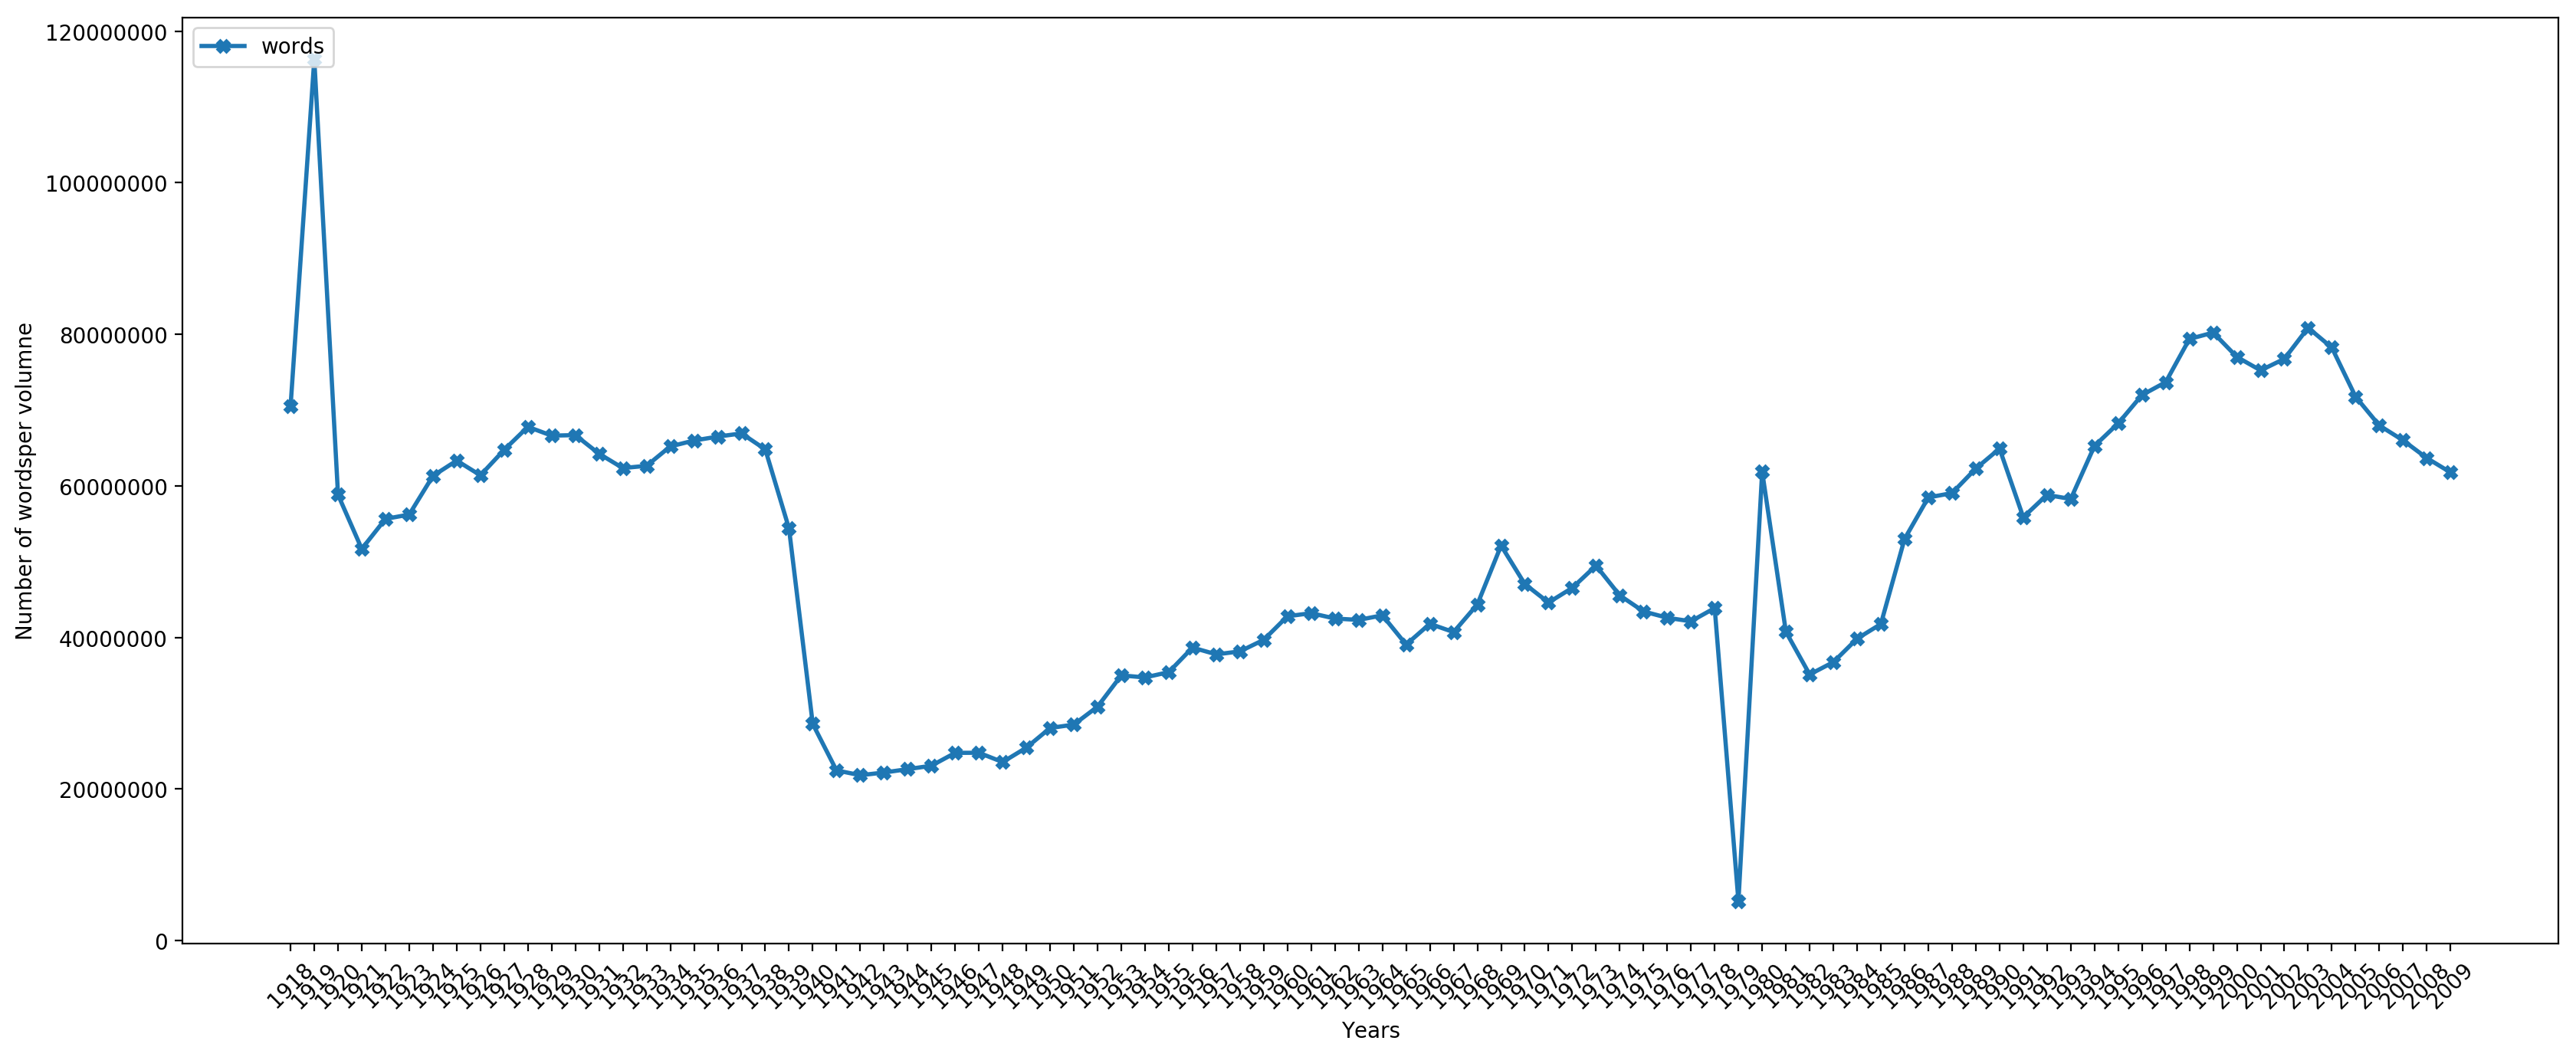

In [13]:
#Plot the variation of number of words 
num_words, words_years = plot_norm(norm_publication, "words")

## 2. Distribution of terms over time

We count the total number of words per year, and then count total instances of each query's search terms in it. 

And then, we **plot normalised frequency** (by words) on a graph (x axis is years), to see whether a term is becoming more or less popular with time. 

Also, we have included the plots of the **raw frequencies** (without normalising the results)

Database and time period: TDA 2008-2010
Target words: H1N1, swine flu, flu, pneumonia, pandemic, epidemic


Lexicon: Spanish flu, influenza, H1N1 , H2N2, Asian flu, foot-and-mouth, H3N2, Hong Kong flu, London flu, bovine spongiform encephalopathy, BSE, mad cow disease, SARS, SARS-CoV-1, severe acute respiratory syndrome, H5N1, H5N8, Avian flu,  bird flu, swine flu, flu, pneumonia, pandemic, epidemic. 



    
**Note**: Since we have a high number of search terms, we have divided them in **5 taxonomies**, in order to improve visualizations. The last one, taxonomy_total, we have used all the search terms in the N-grams. 

In [14]:
lexicon_string='Spanish flu, influenza, H1N1 , H2N2, Asian flu, foot-and-mouth, H3N2, Hong Kong flu, London flu, bovine spongiform encephalopathy, BSE, mad cow disease, SARS, SARS-CoV-1, severe acute respiratory syndrome, H5N1, H5N8, Avian flu,  bird flu, swine flu, flu, pneumonia, pandemic, epidemic'
lexicon= re.split('; |, |\*|\n',lexicon_string)

In [15]:
lexicon_norm=[]
for keysentence in lexicon:
    k_split = keysentence.split()
    sentence_word = [normalize(word) for word in k_split]
    sentence_norm = ''
    for word in sentence_word:
        if sentence_norm == '':
            sentence_norm = word
        else:
            sentence_norm += " " + word
    lexicon_norm.append(sentence_norm)

In [16]:
lexicon_norm

['spanish flu',
 'influenza',
 'h1n1',
 'h2n2',
 'asian flu',
 'footandmouth',
 'h3n2',
 'hong kong flu',
 'london flu',
 'bovine spongiform encephalopathy',
 'bse',
 'mad cow disease',
 'sars',
 'sarscov1',
 'severe acute respiratory syndrome',
 'h5n1',
 'h5n8',
 'avian flu',
 'bird flu',
 'swine flu',
 'flu',
 'pneumonia',
 'pandemic',
 'epidemic']

#### Taxomomy_1

In [17]:
 print("Terms used in Taxonomy 1: %s" %(' '.join(lexicon_norm[0:5])))

Terms used in Taxonomy 1: spanish flu influenza h1n1 h2n2 asian flu


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


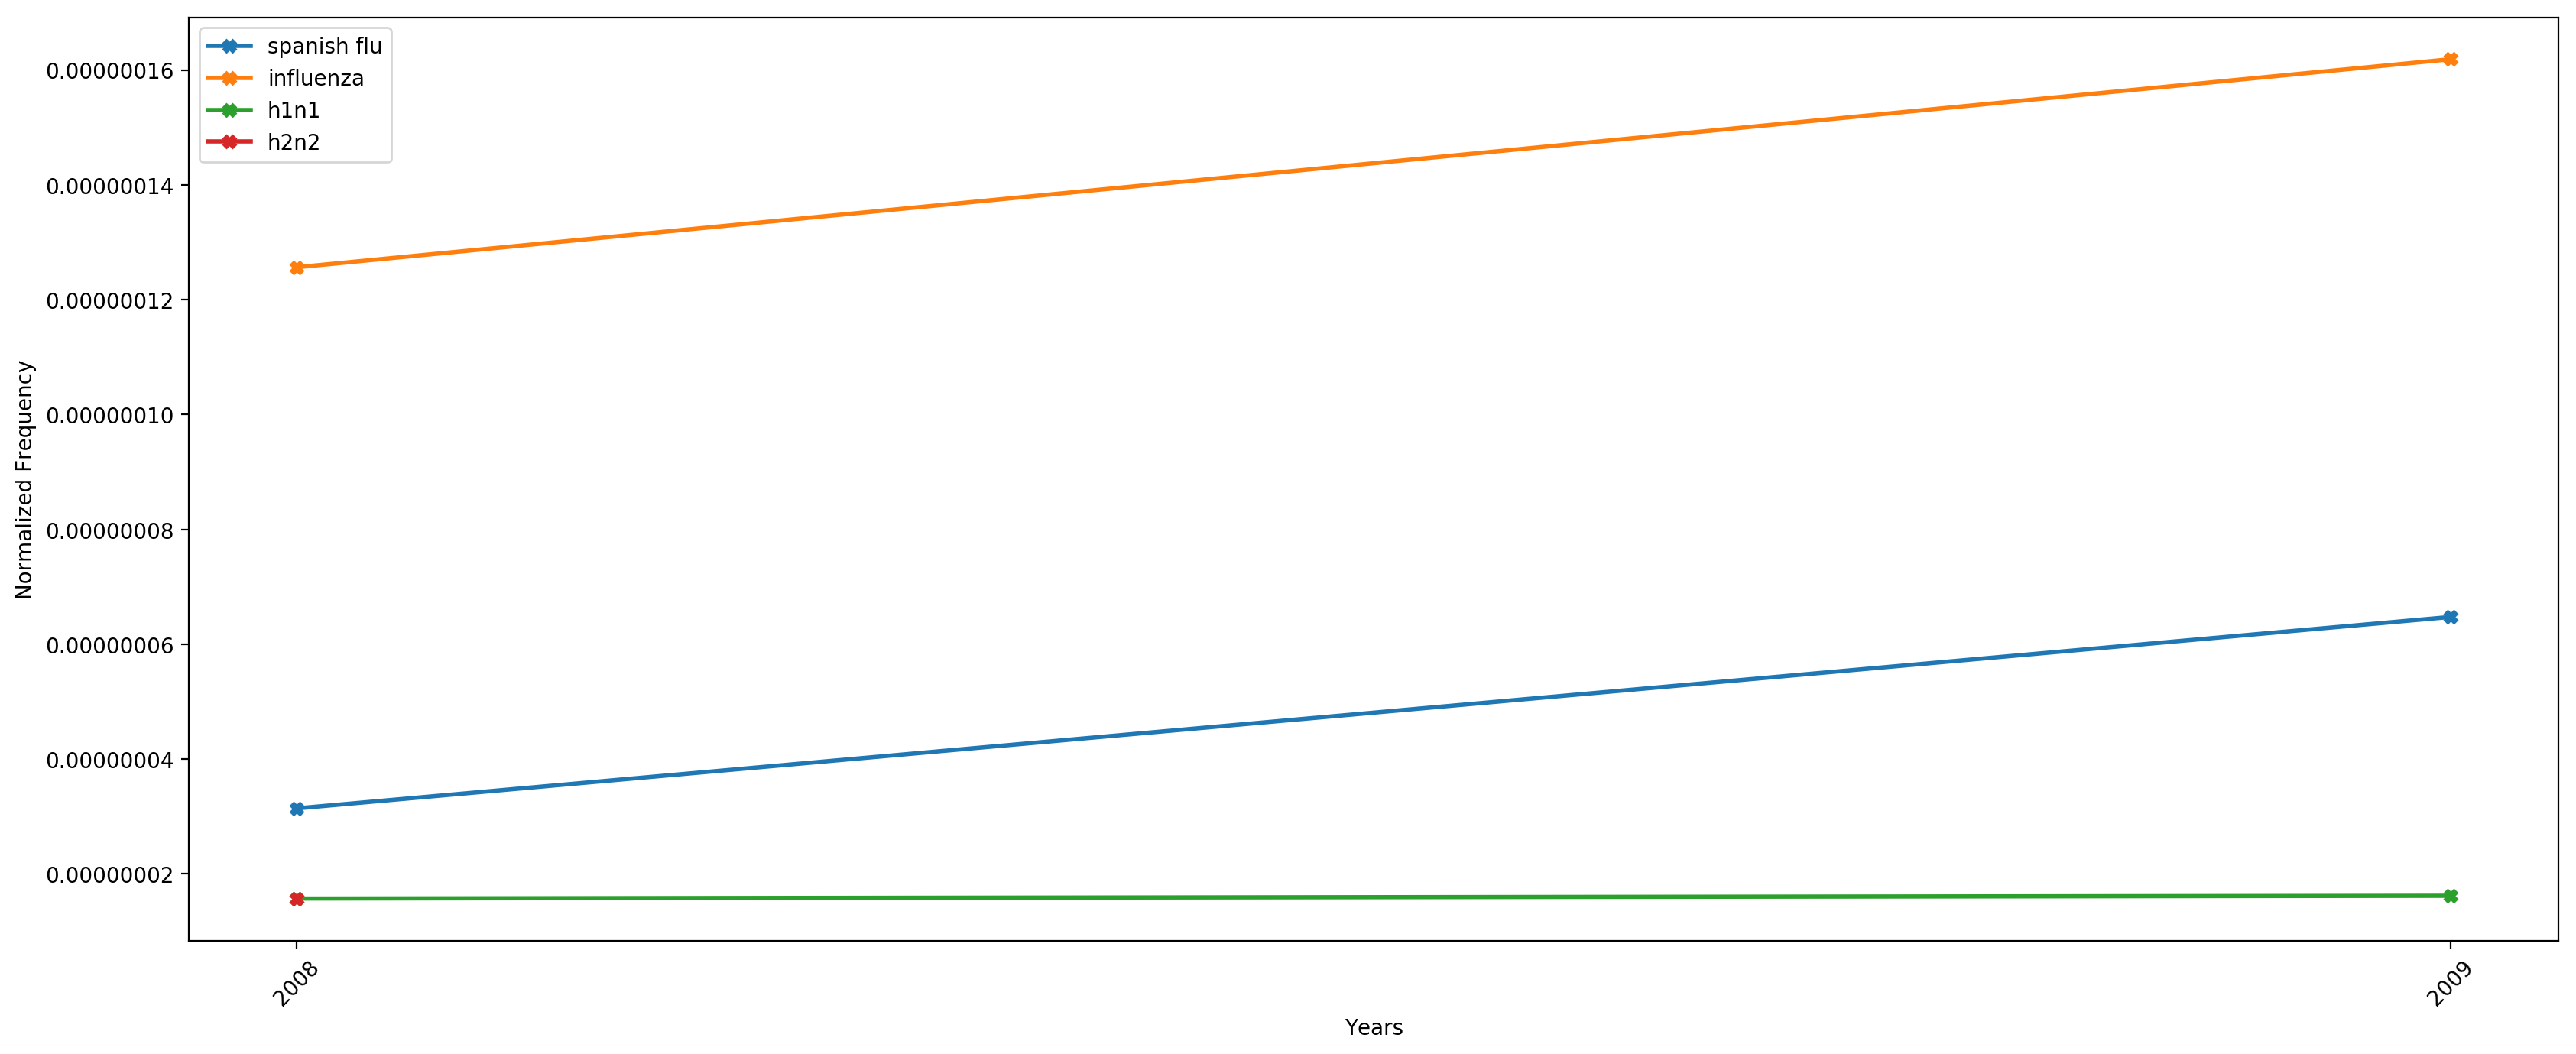

In [18]:
taxonomy_1= lexicon_norm[0:5]

query_results=read_query_results('results_pandemics_norm_num_q8')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_1
normalize_freq(norm_publication, freq_count_norm, taxonomy_1)

####  Without normalising - Visualising the raw frequencies  of taxonomy 1

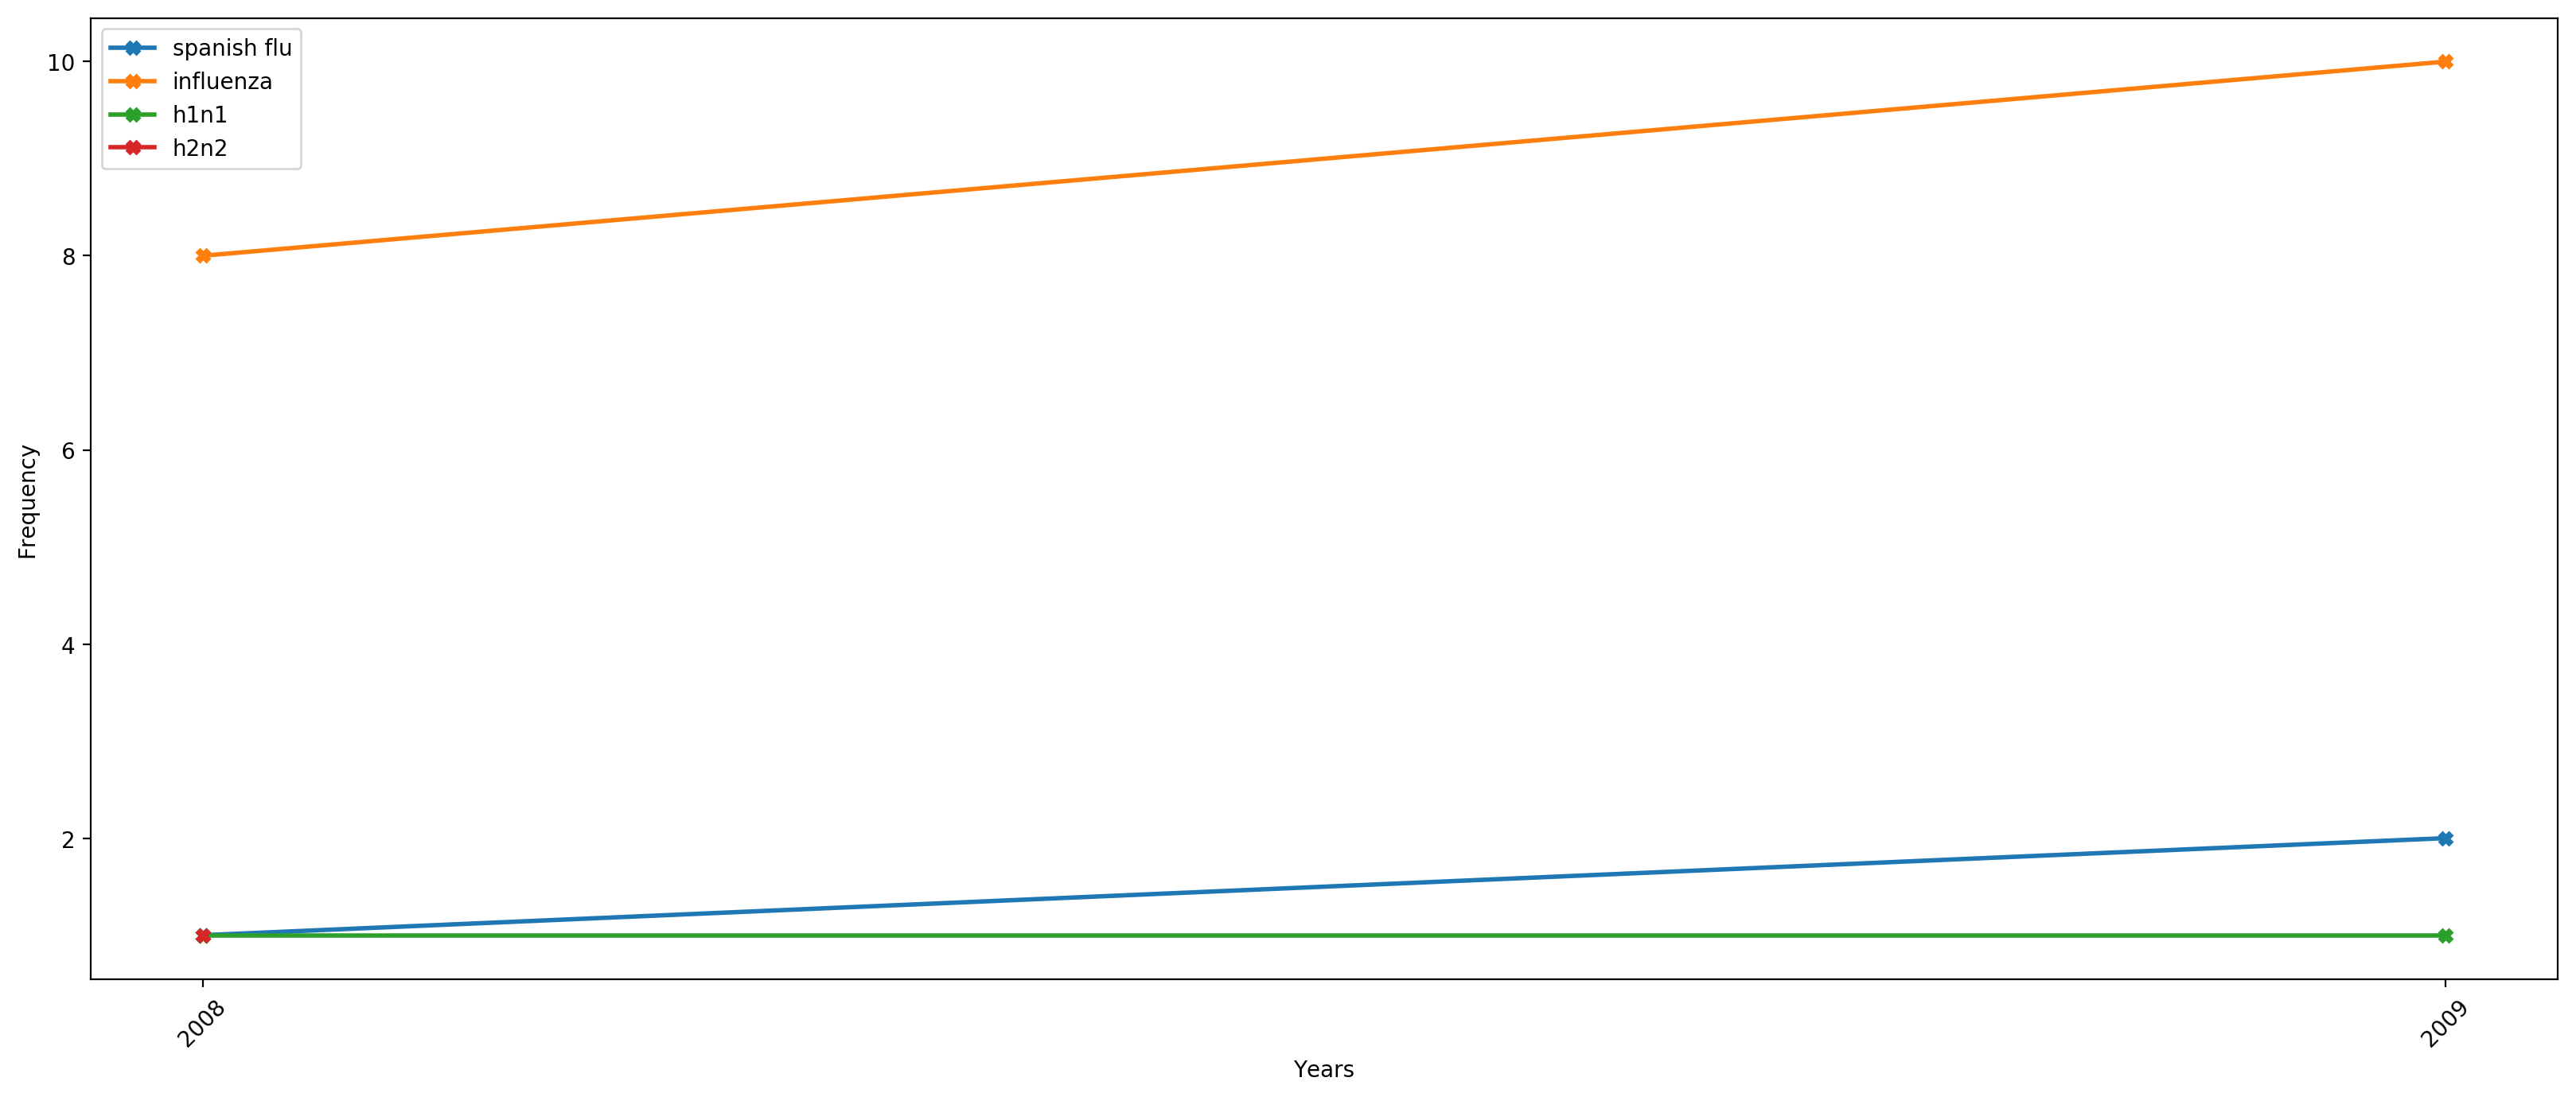

In [19]:
plot_freq_count(freq_count_norm, taxonomy_1)

#### Taxomomy_2:

In [20]:
 print("Terms used in Taxonomy 2: %s" %(' '.join(lexicon_norm[5:10])))

Terms used in Taxonomy 2: footandmouth h3n2 hong kong flu london flu bovine spongiform encephalopathy


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


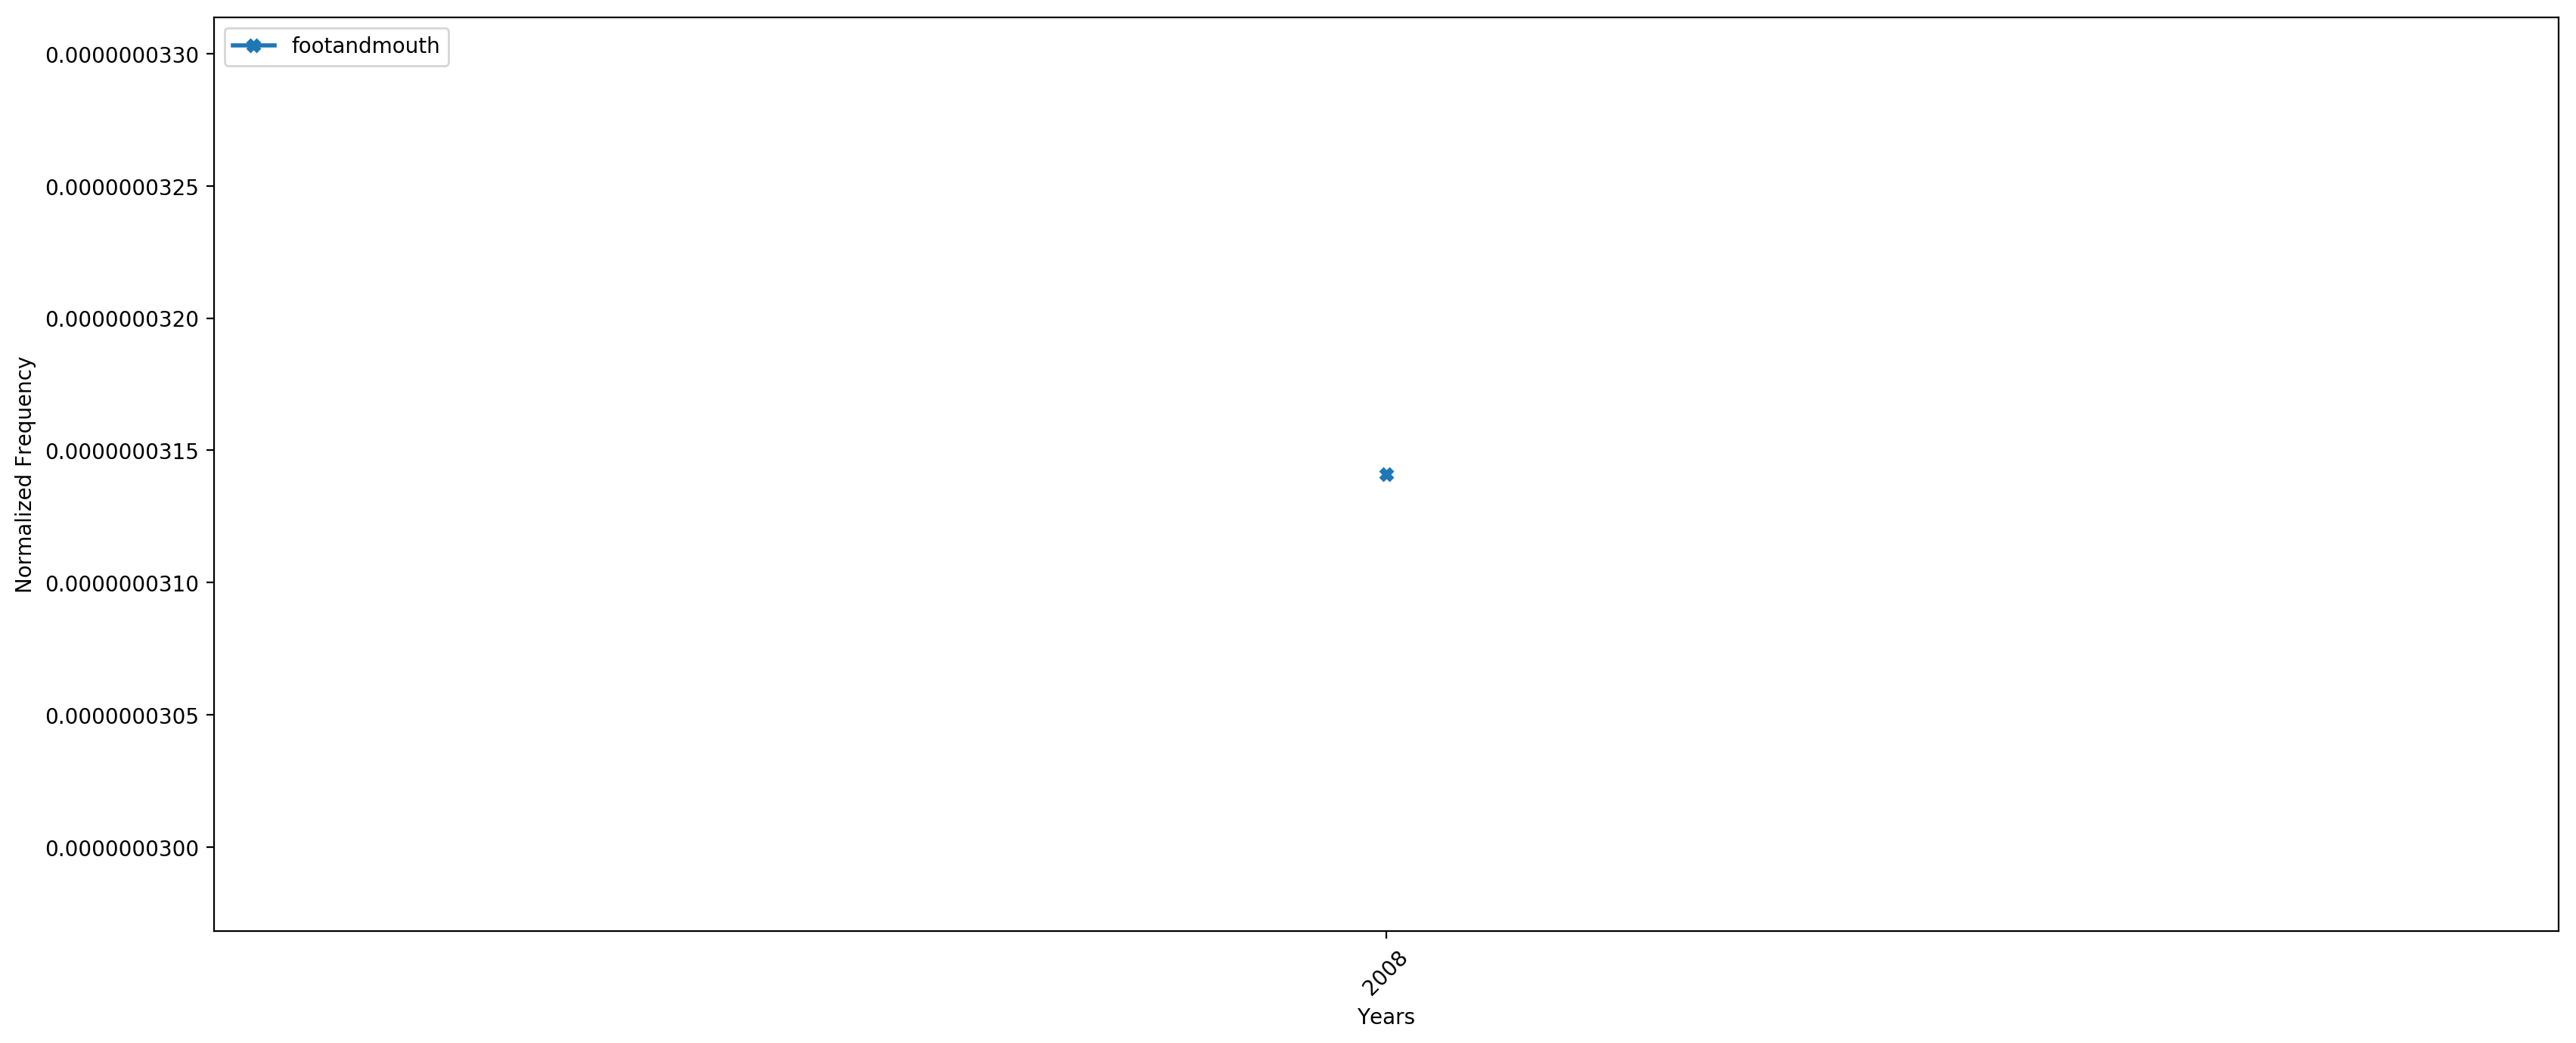

In [21]:
taxonomy_2= lexicon_norm[5:10]

query_results=read_query_results('results_pandemics_norm_num_q8')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_2
normalize_freq(norm_publication, freq_count_norm, taxonomy_2)

#### Without normalising - Visualising the raw frequencies of taxonomy 2

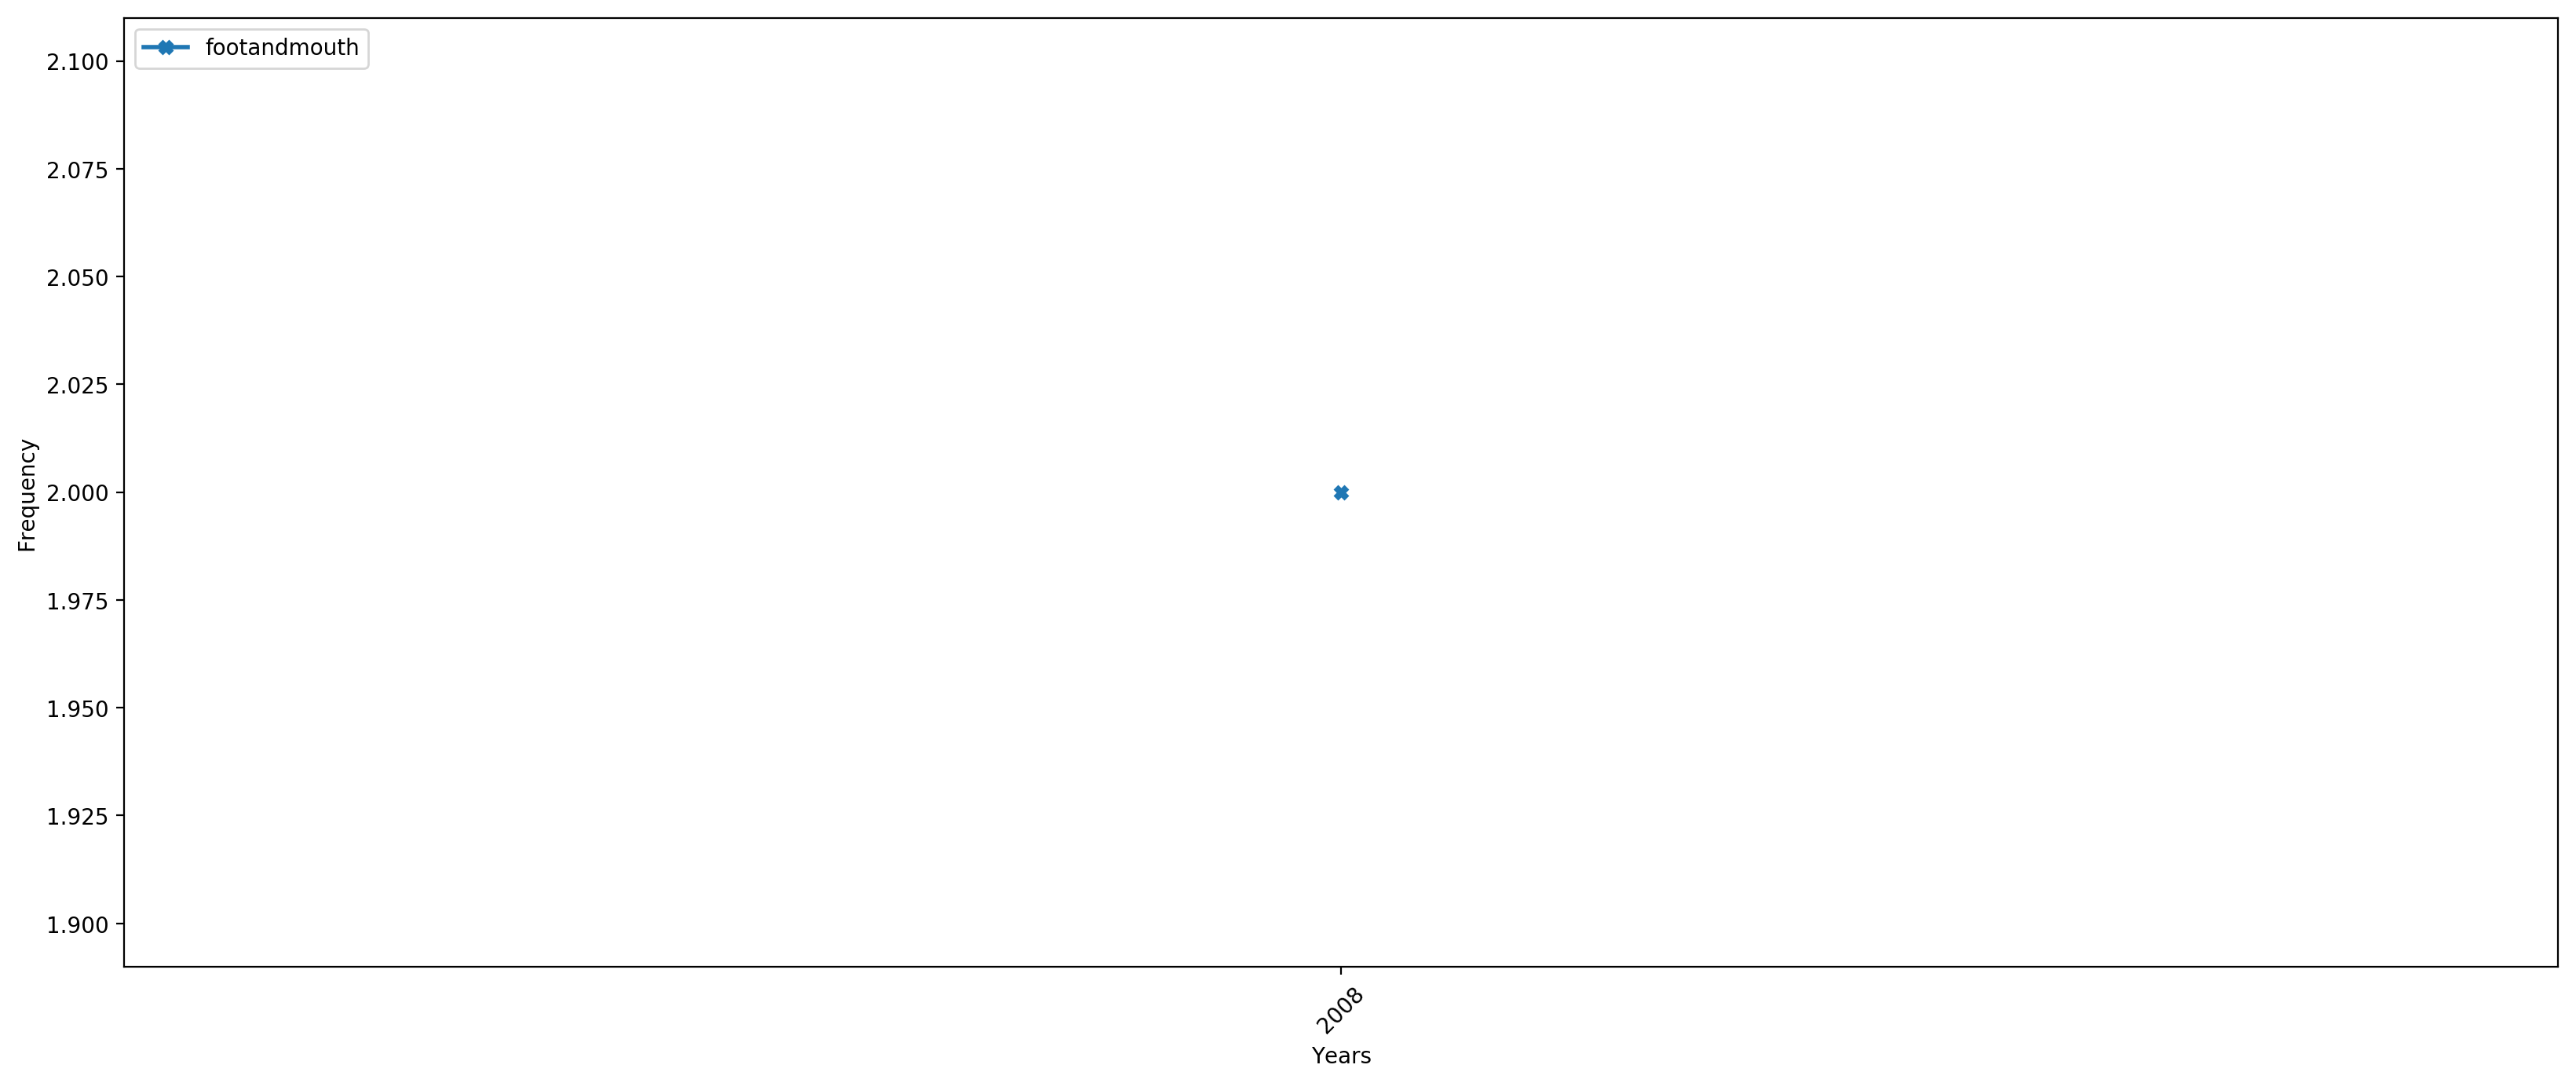

In [22]:
plot_freq_count(freq_count_norm, taxonomy_2)

#### Taxomomy_3

In [23]:
 print("Terms used in Taxonomy 3: %s" %(' '.join(lexicon_norm[10:15])))

Terms used in Taxonomy 3: bse mad cow disease sars sarscov1 severe acute respiratory syndrome


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


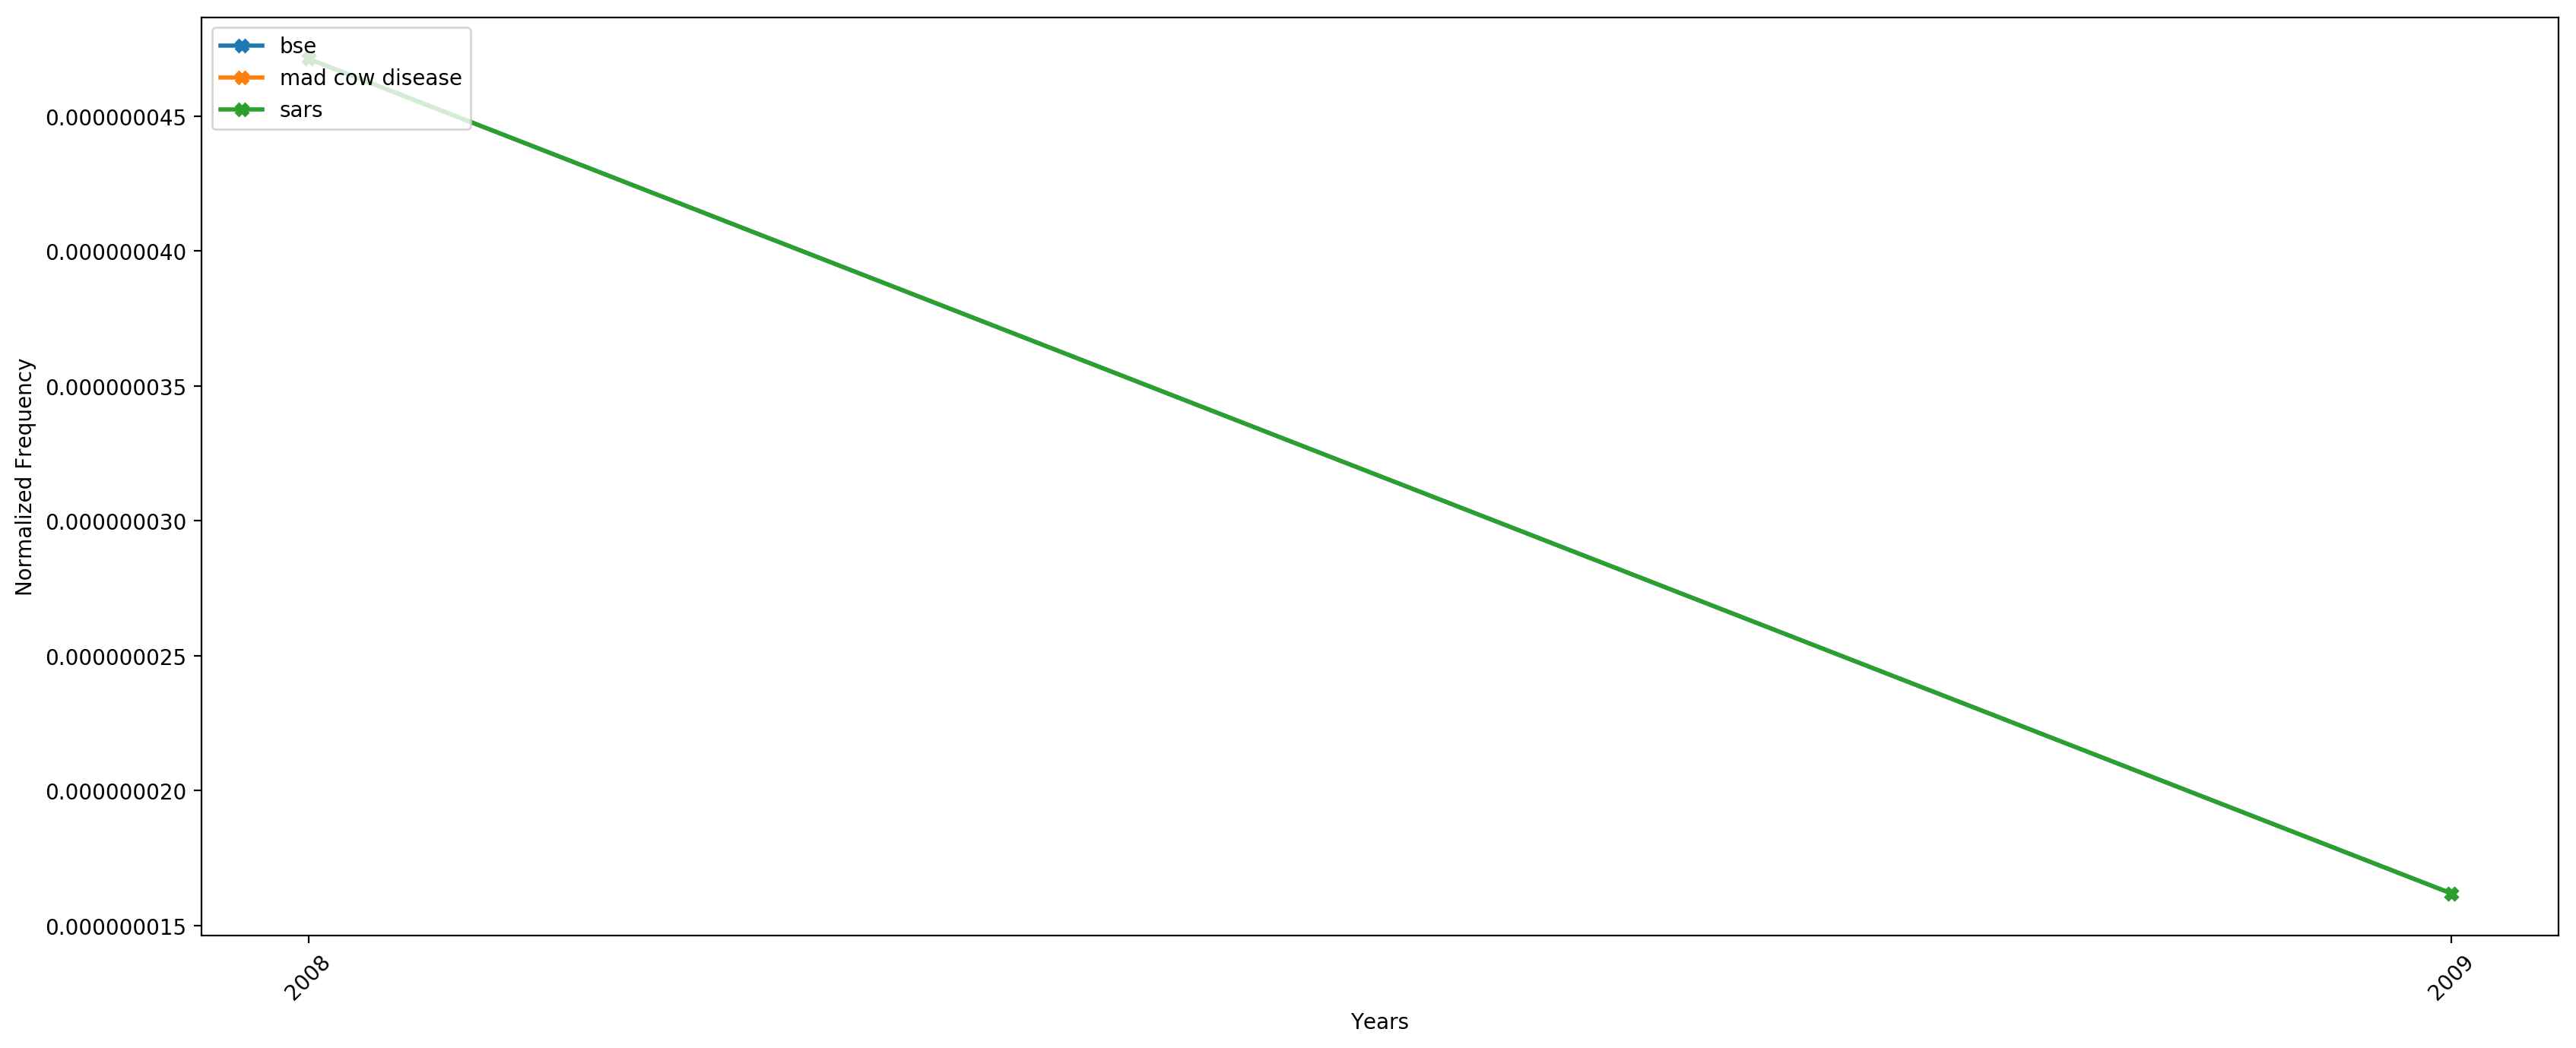

In [24]:
taxonomy_3= lexicon_norm[10:15]

query_results=read_query_results('results_pandemics_norm_num_q8')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_3
normalize_freq(norm_publication, freq_count_norm, taxonomy_3)

#### Without normalising - Visualising the raw frequencies of taxonomy 3

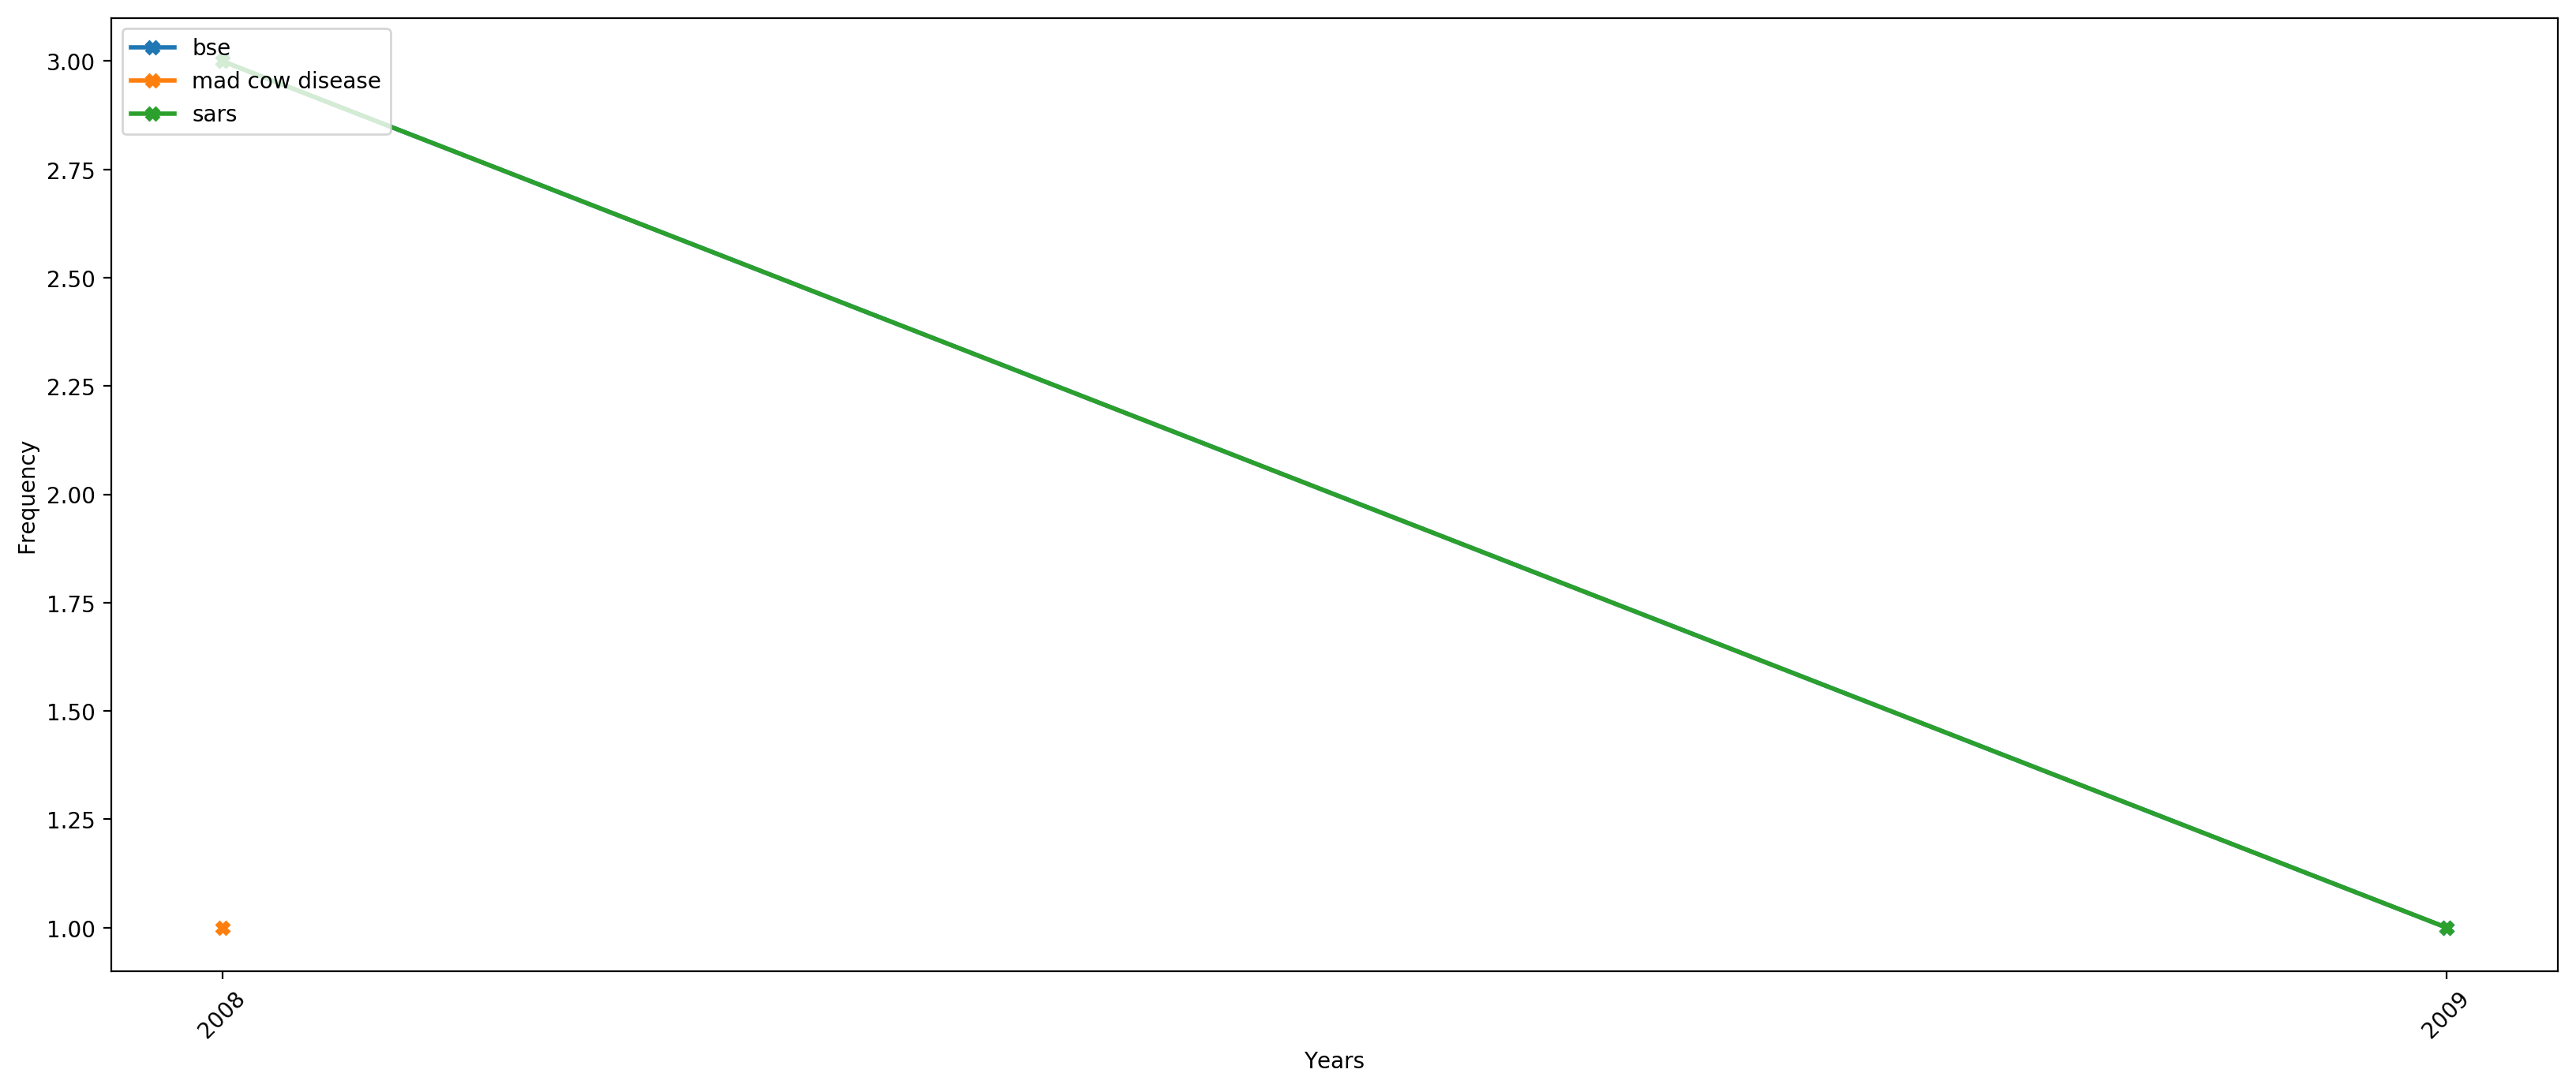

In [25]:
plot_freq_count(freq_count_norm, taxonomy_3)

#### Taxomomy_4

In [26]:
 print("Terms used in Taxonomy 4: %s" %(' '.join(lexicon_norm[15:20])))

Terms used in Taxonomy 4: h5n1 h5n8 avian flu bird flu swine flu


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


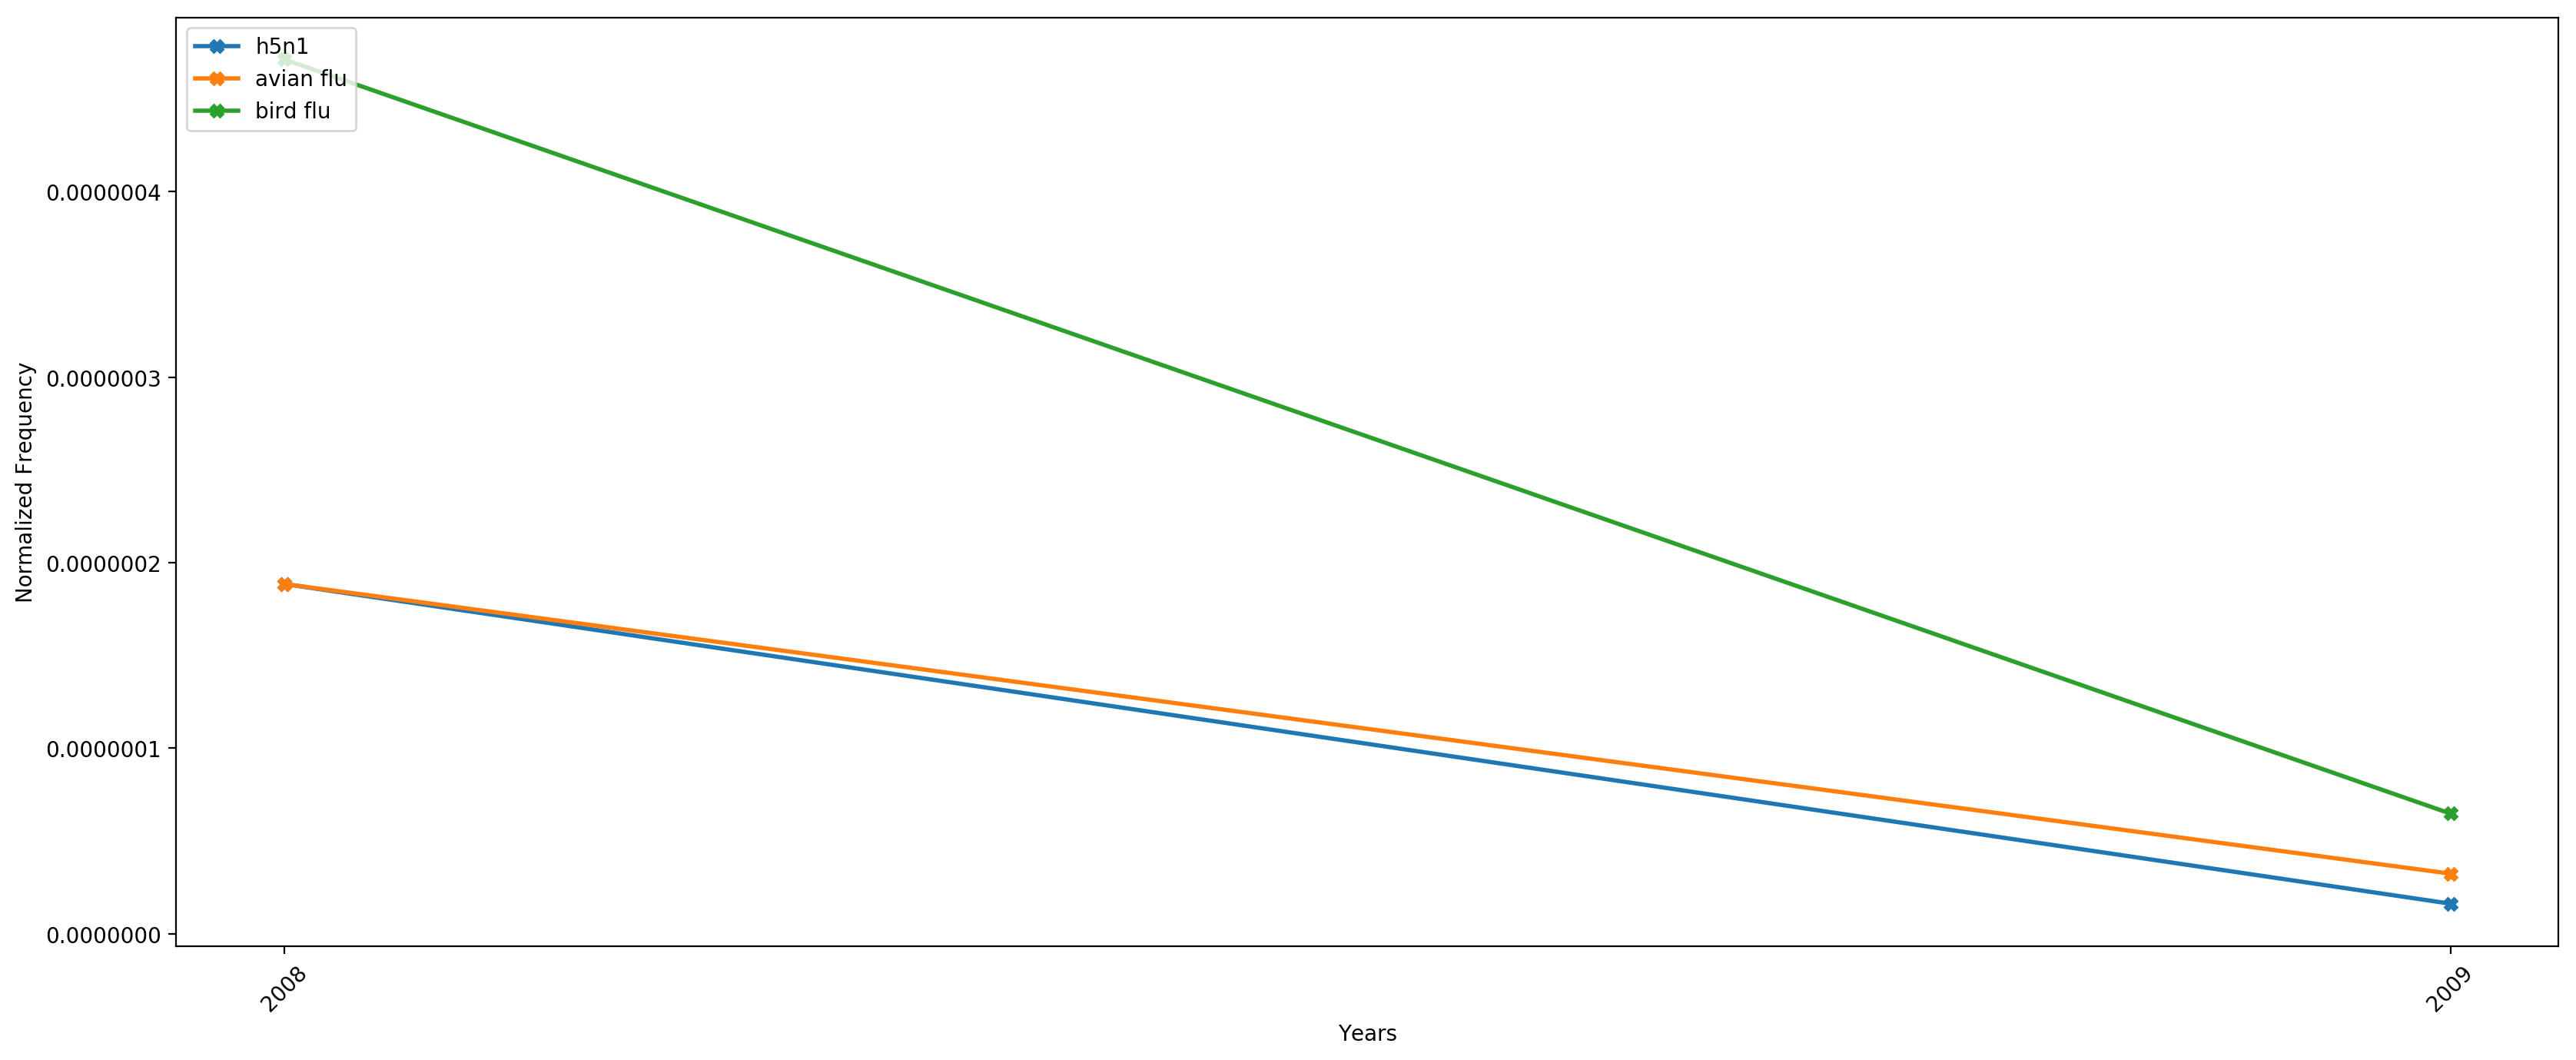

In [27]:
taxonomy_4= lexicon_norm[15:20]

query_results=read_query_results('results_pandemics_norm_num_q8')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_4
normalize_freq(norm_publication, freq_count_norm, taxonomy_4)

####  Without normalising - Visualising the raw frequencies of taxonomy 4

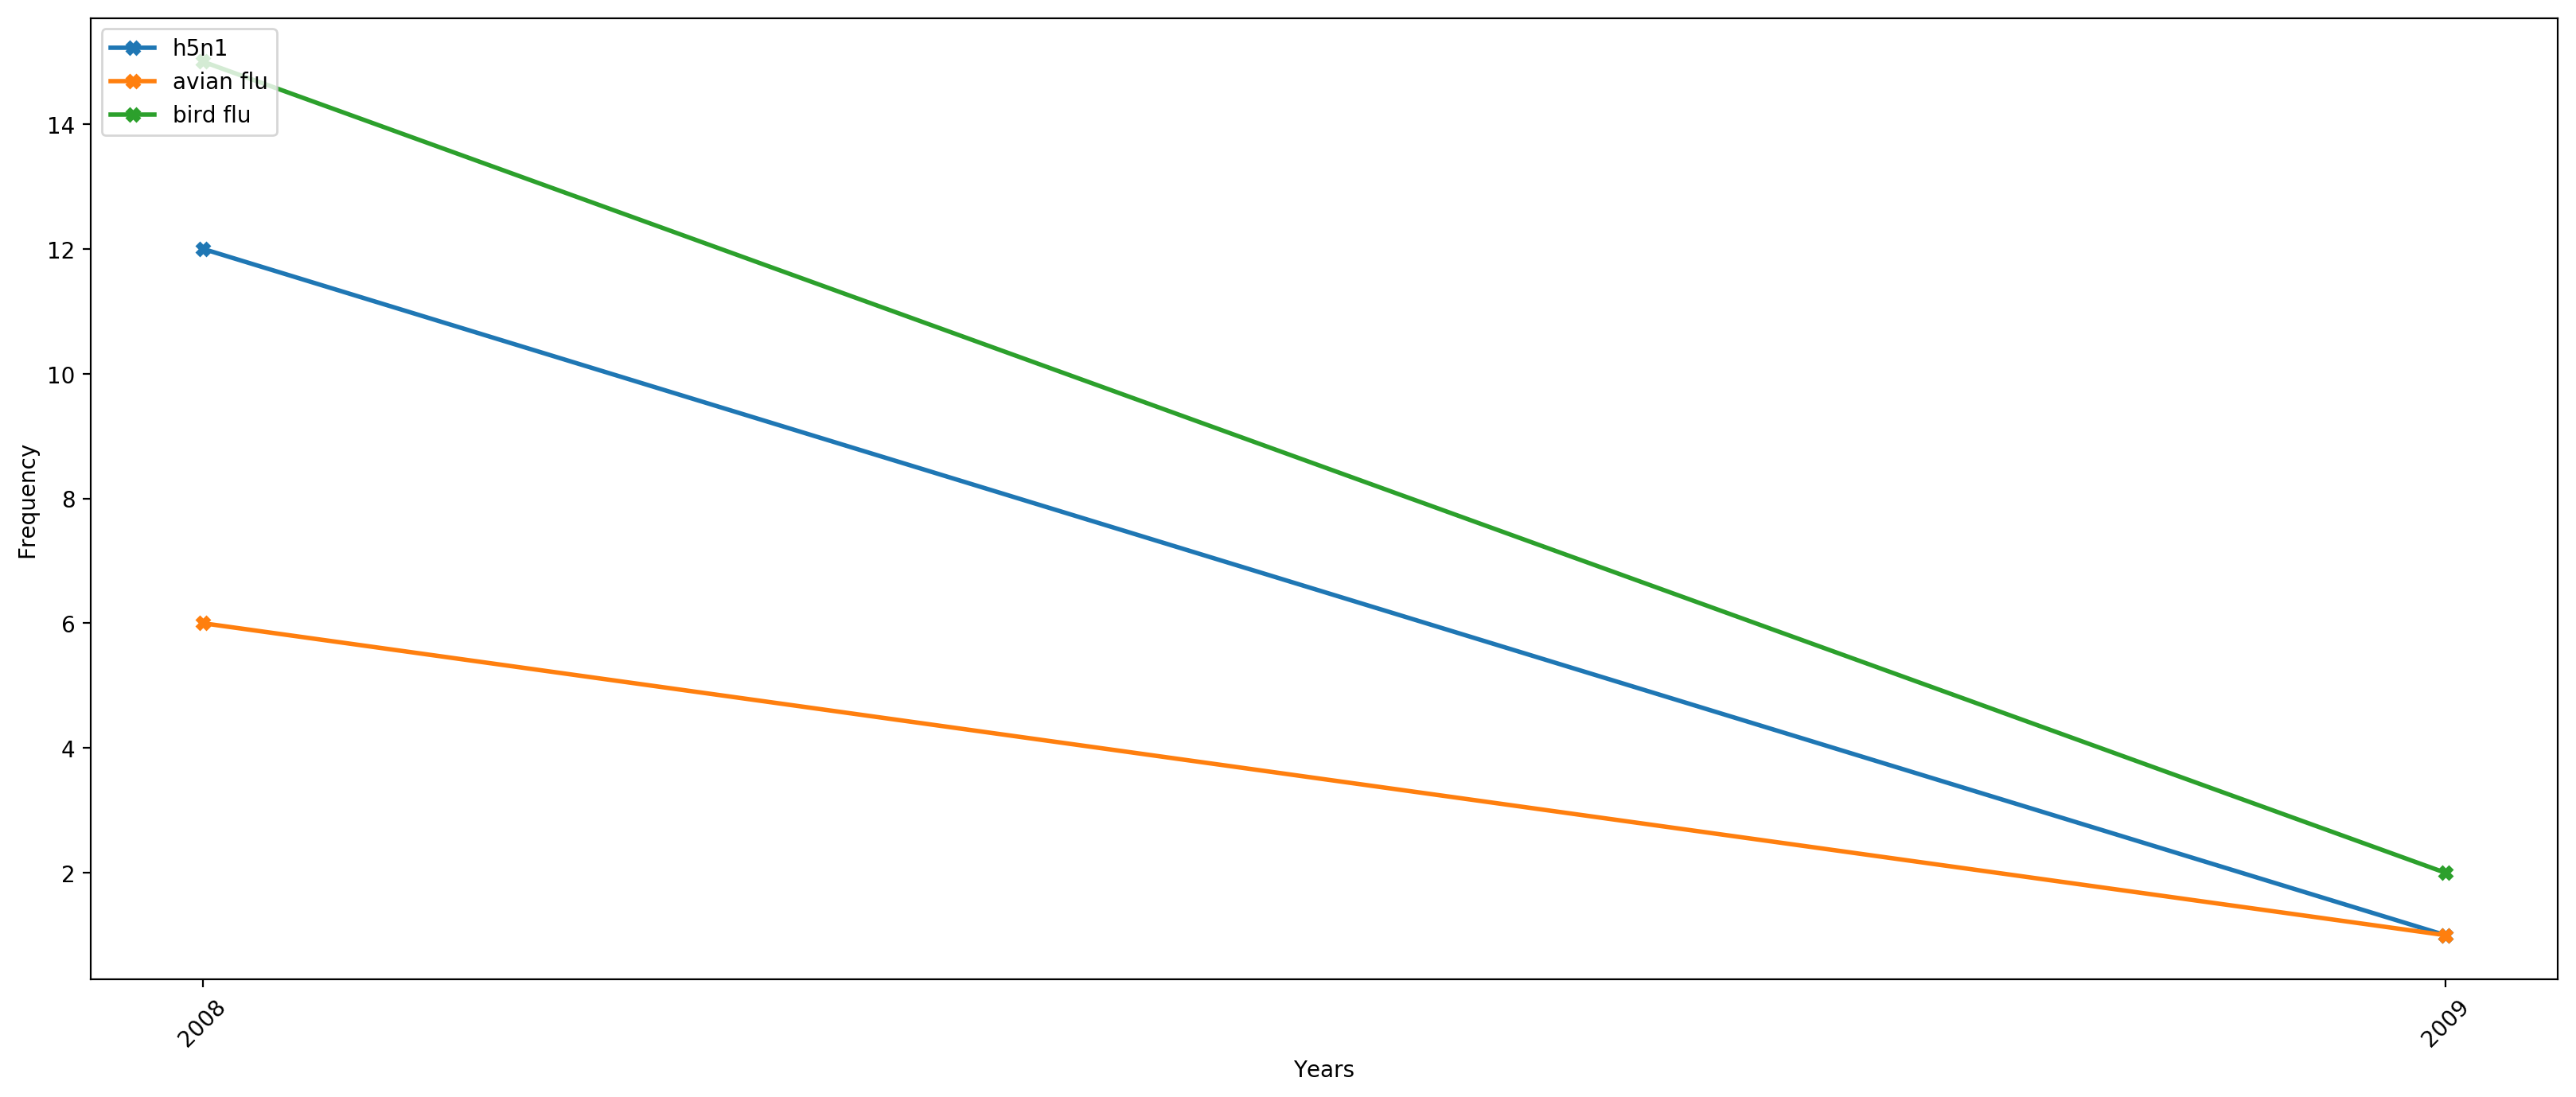

In [28]:
plot_freq_count(freq_count_norm, taxonomy_4)

#### Taxomomy_5

In [29]:
 print("Terms used in Taxonomy 5: %s" %(' '.join(lexicon_norm[20:])))

Terms used in Taxonomy 5: flu pneumonia pandemic epidemic


/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


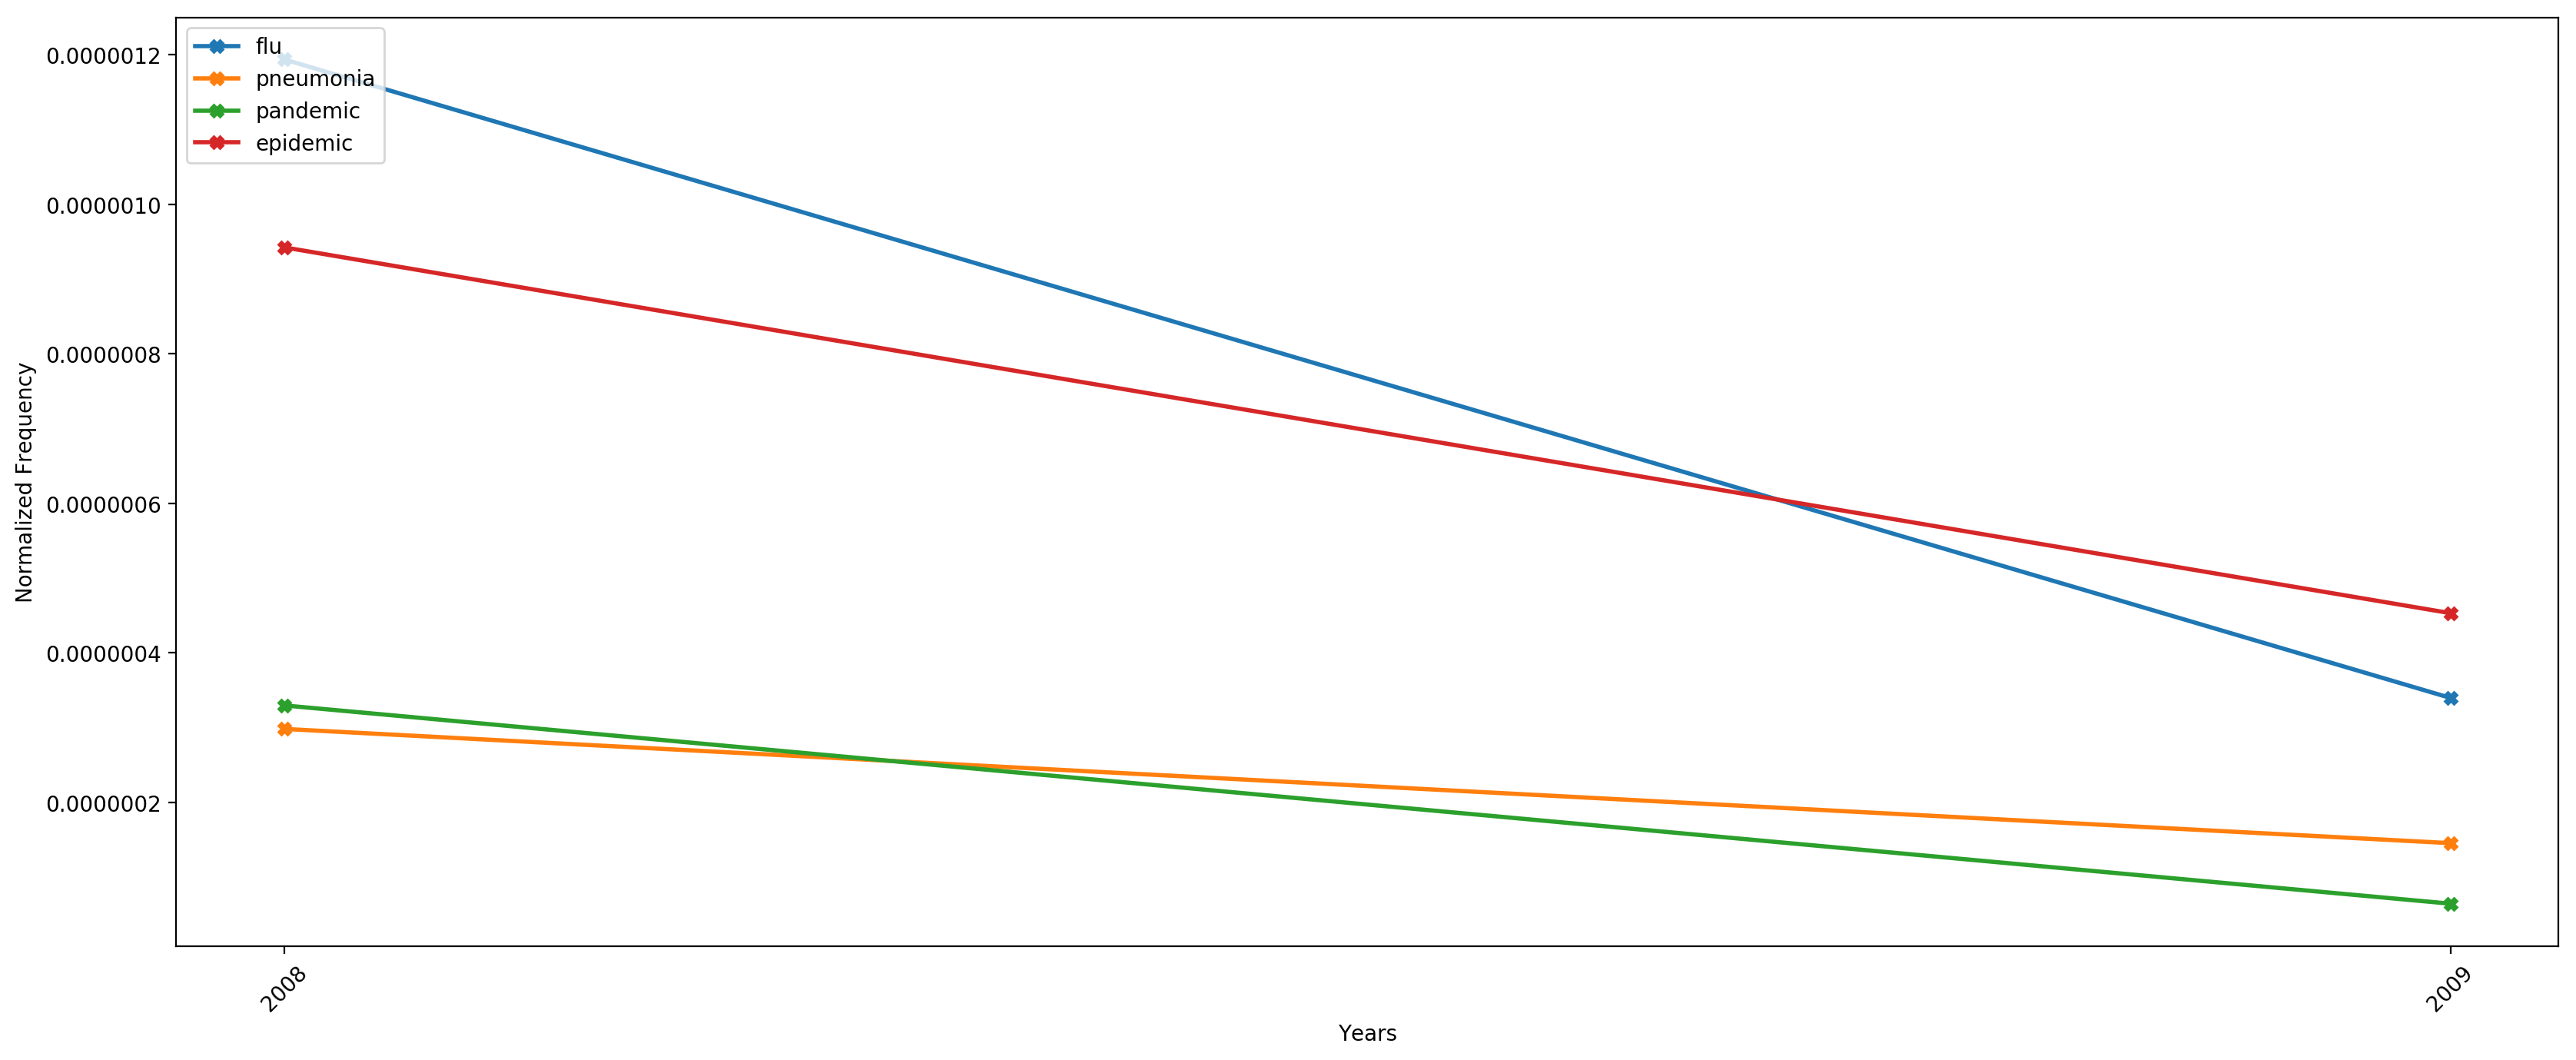

In [30]:
taxonomy_5= lexicon_norm[20:]

query_results=read_query_results('results_pandemics_norm_num_q8')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_5
normalize_freq(norm_publication, freq_count_norm, taxonomy_5)

####  Without normalising - Visualising the raw frequencies of taxonomy 5

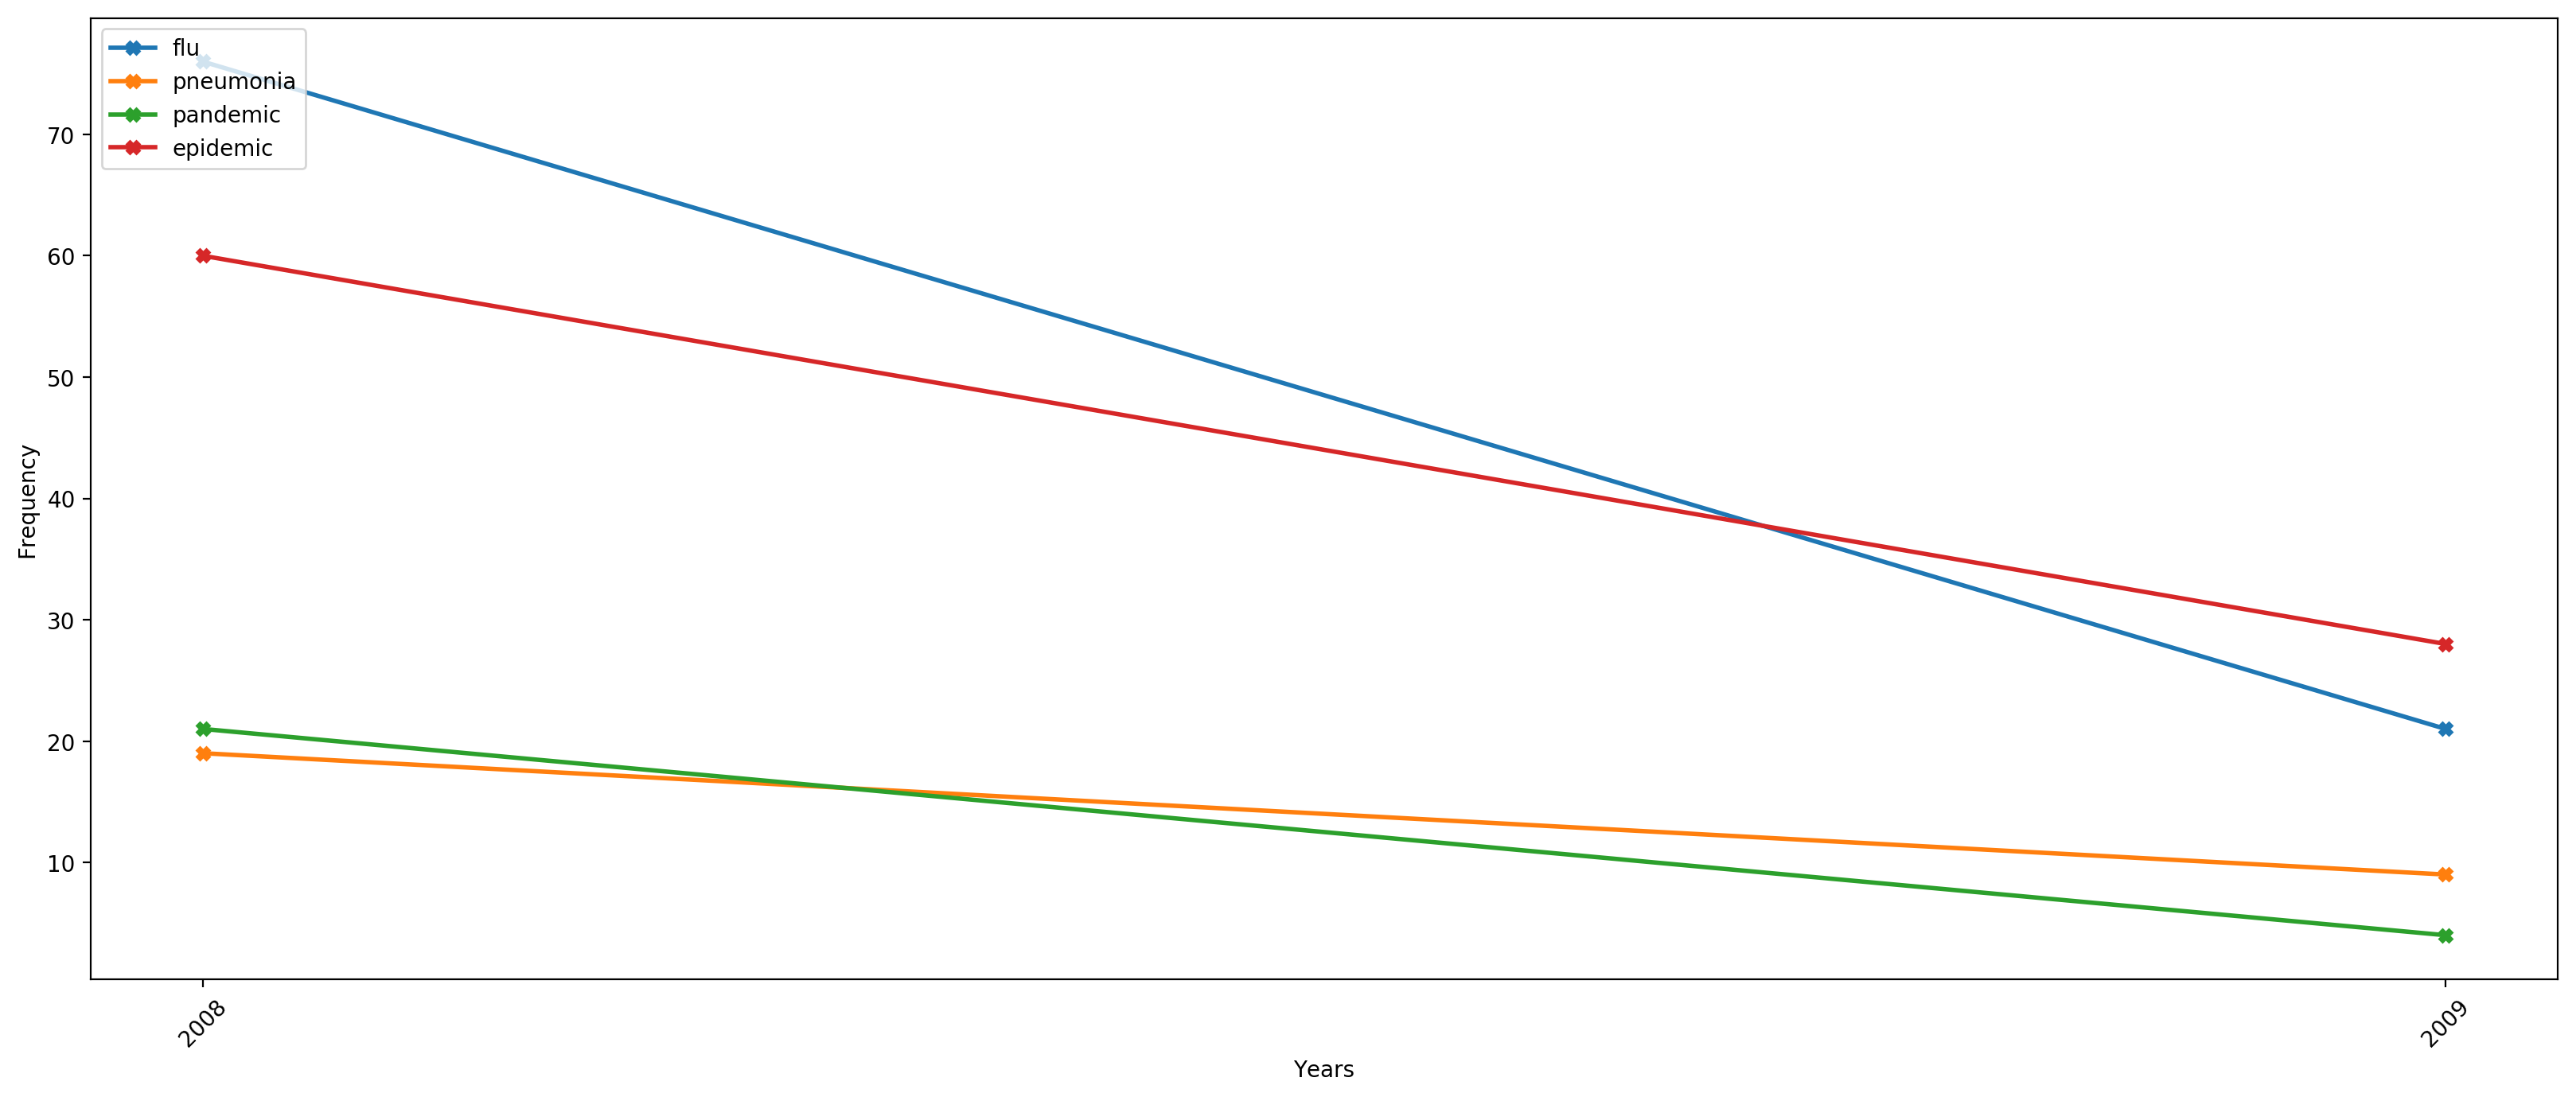

In [31]:
plot_freq_count(freq_count_norm, taxonomy_5)

#### Taxomomy TOTAL : Using all the words from the lexicon in the same N-grams

/anaconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


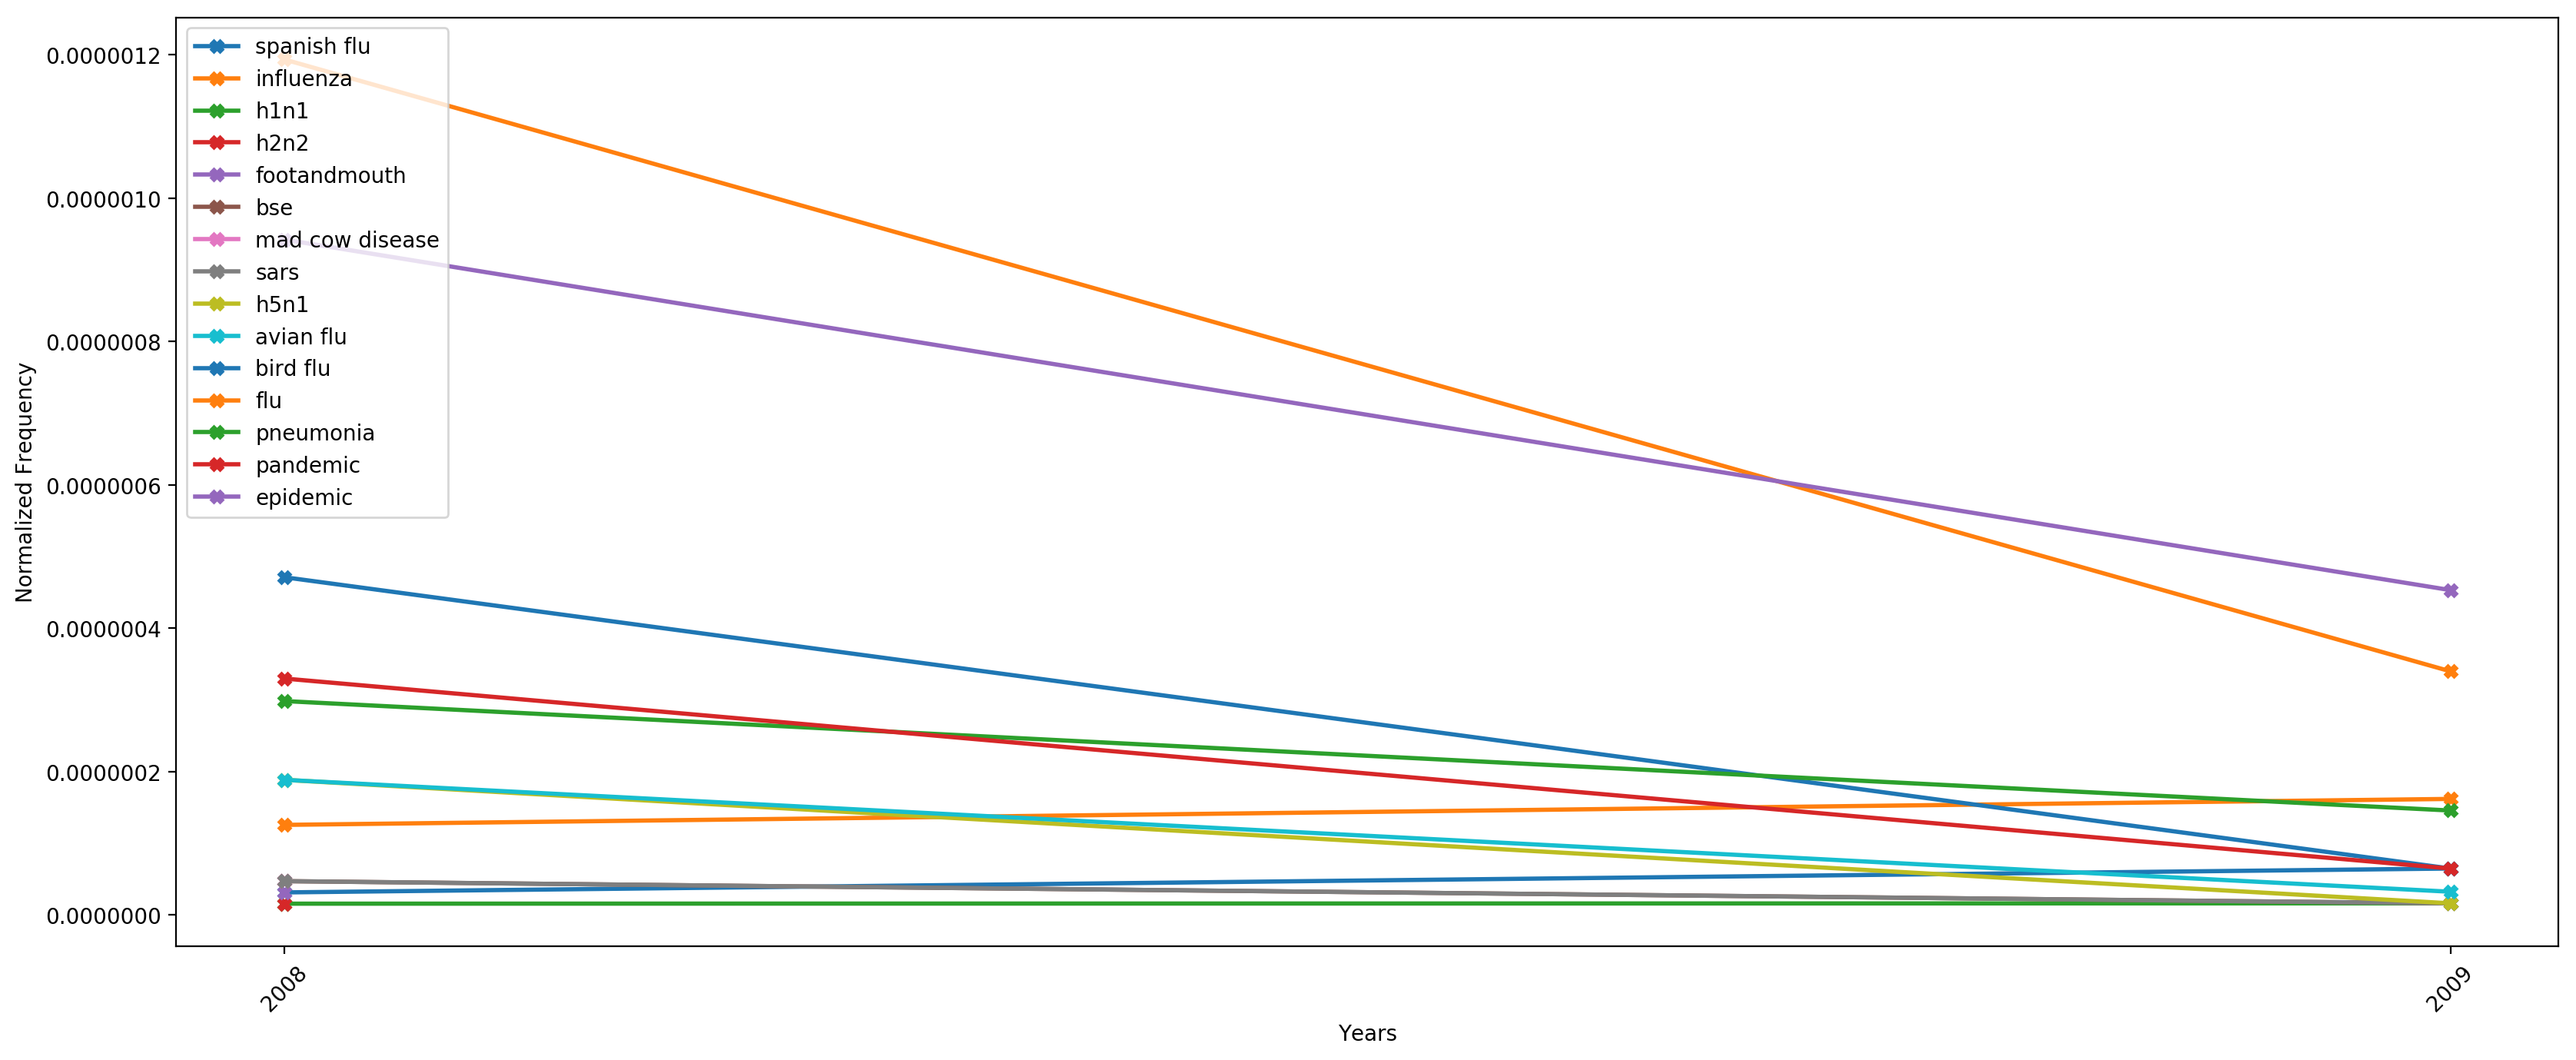

In [32]:
taxonomy_total= lexicon_norm[:]

query_results=read_query_results('results_pandemics_norm_num_q8')
freq_count_norm=freq_count(query_results)

# Visualizing the normalized frequencies of taxomomy_total
normalize_freq(norm_publication, freq_count_norm, taxonomy_total)

####  Without normalising - Visualising the raw frequencies of taxonomy total

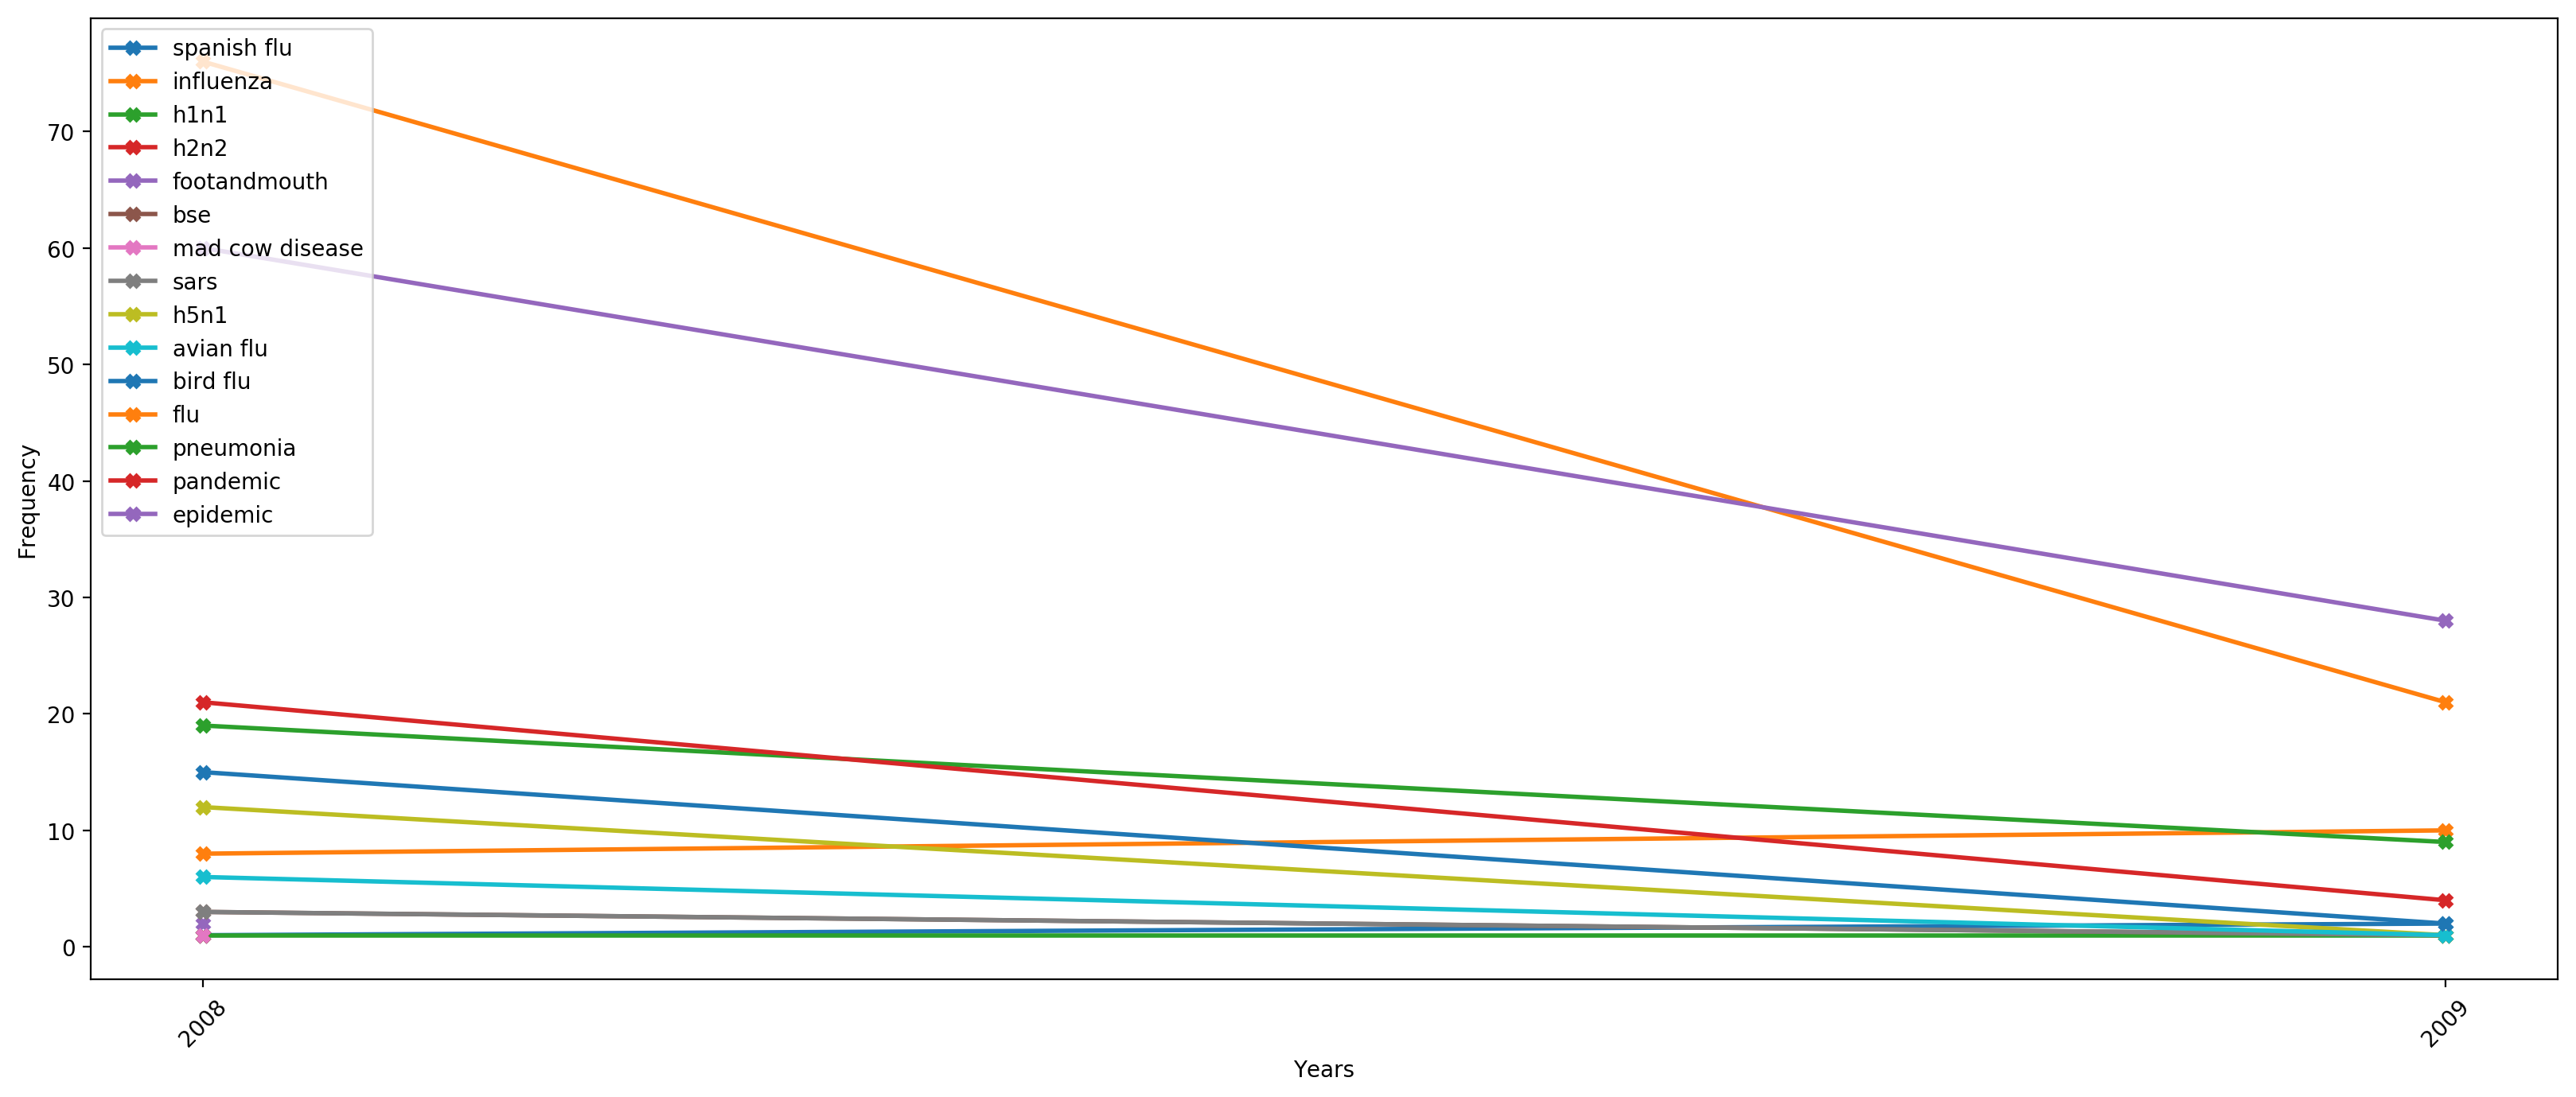

In [33]:
plot_freq_count(freq_count_norm, taxonomy_total)